- **required packages**
    - wave
    - numpy
    - pandas 
- **variables**
    - wav_file(str): the path of an audio file to go under Fourier Transformation
    - out_plot(str): a file name to save the visualization
    - frame_size(int): the number of samples for one frame
    - frame_shift(int): the number of samples between two adjacent frames
    - sampling_frequency(int): the number of samples to note for 1 second
    - num_samples(int): the number of samples in the audio file
    - waveform(ndarray) : x-axis Time y-axis Amplitude audio 
    - fft_size(int): the number of samples to process Fourier Transform
    - spectrum(ndarray): x-axis Frequency y-axis Amplitude audio
    - absolute(ndarray): absolute value of spectrum file
    - log_absolute(ndarray): log-absolute value of spectrum file
- **steps**
    - assign
        - wav_file, out_plot, frame_size, frame_shift, fft_size
    - read files and attributes
        - sampling_frequency, num_samples, waveform
    - perform FFT
        - spectrum, absolute, log_absolute
    - save and export

In [2]:
import wave
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\AARONC~1\AppData\Local\Temp/ipykernel_5980/1411459992.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (10, 10))


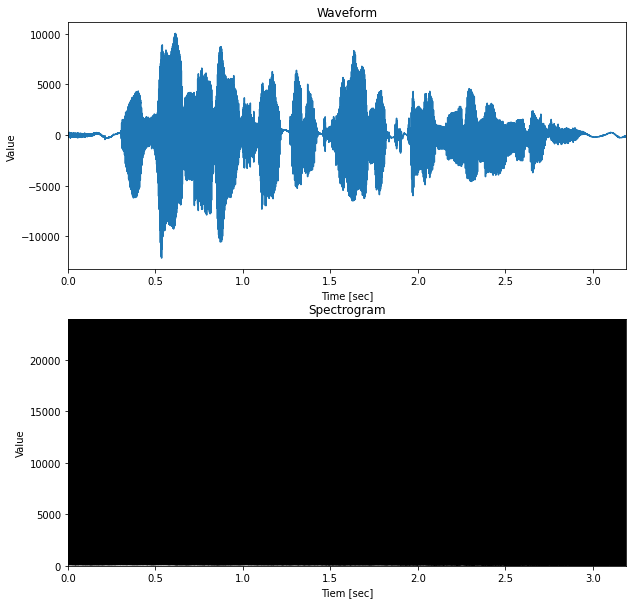

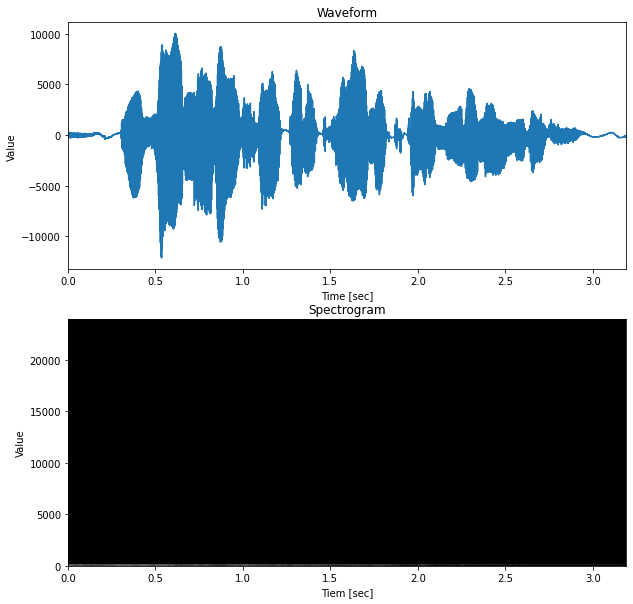

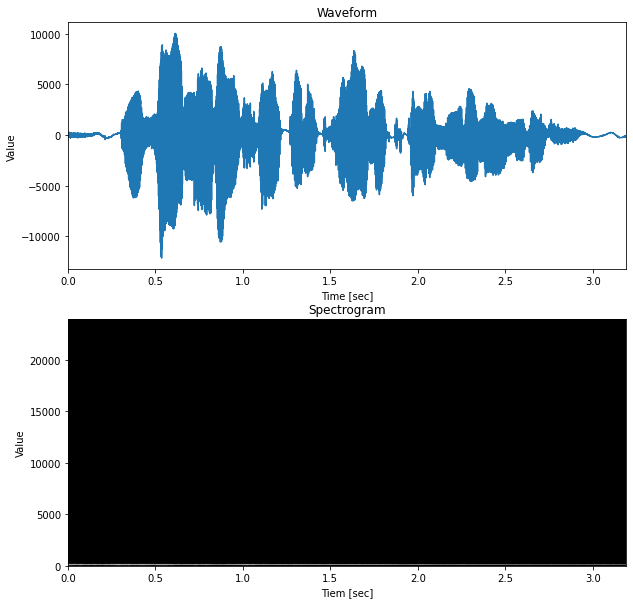

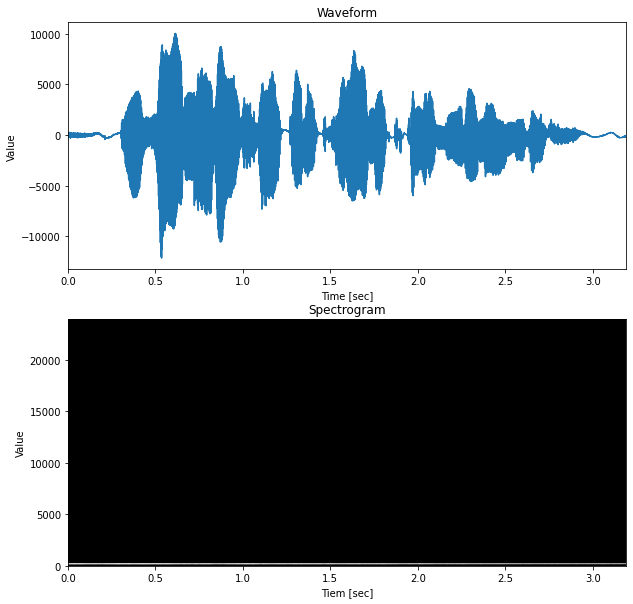

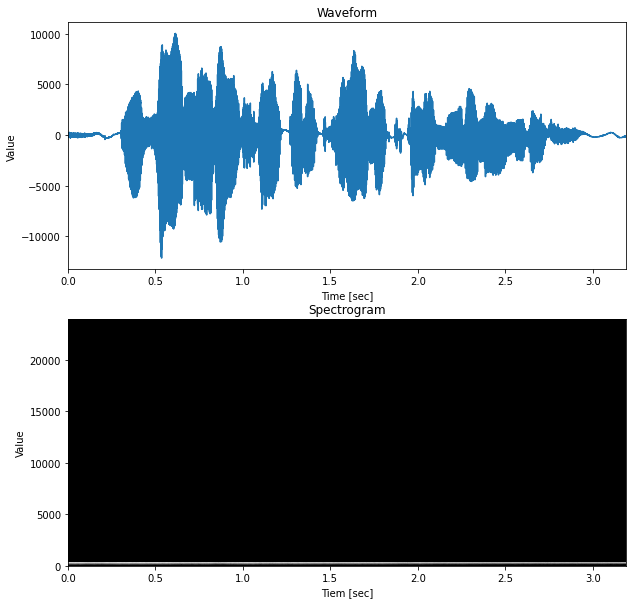

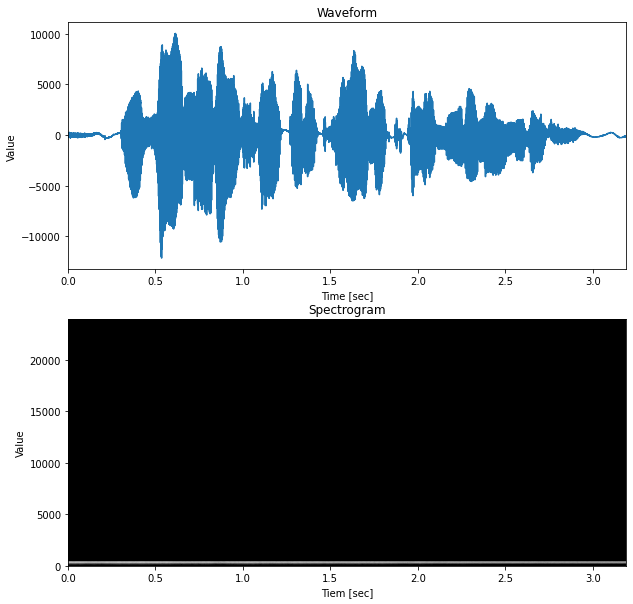

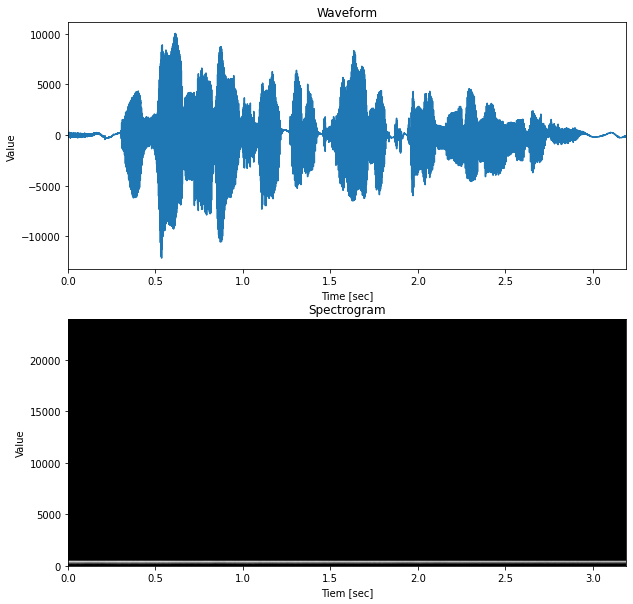

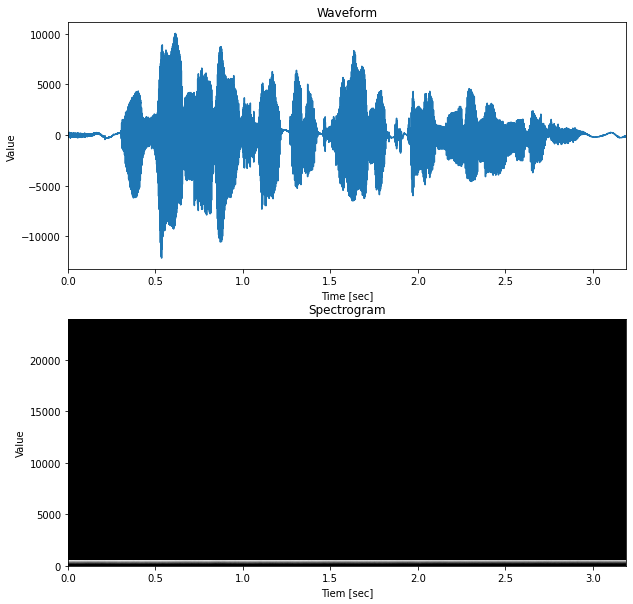

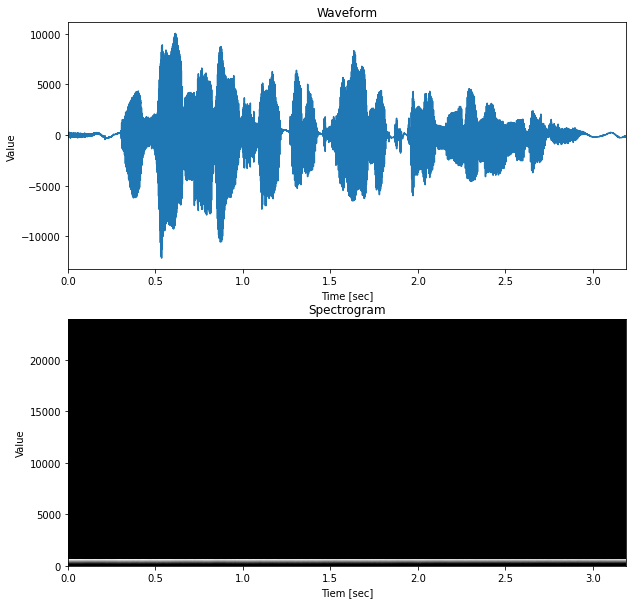

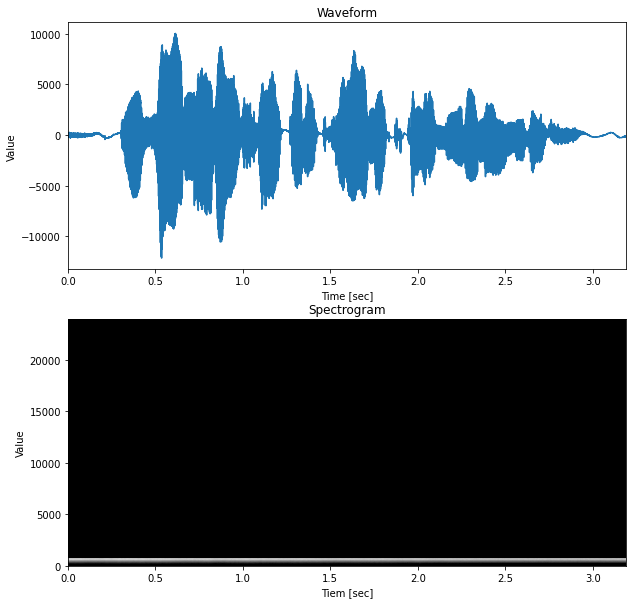

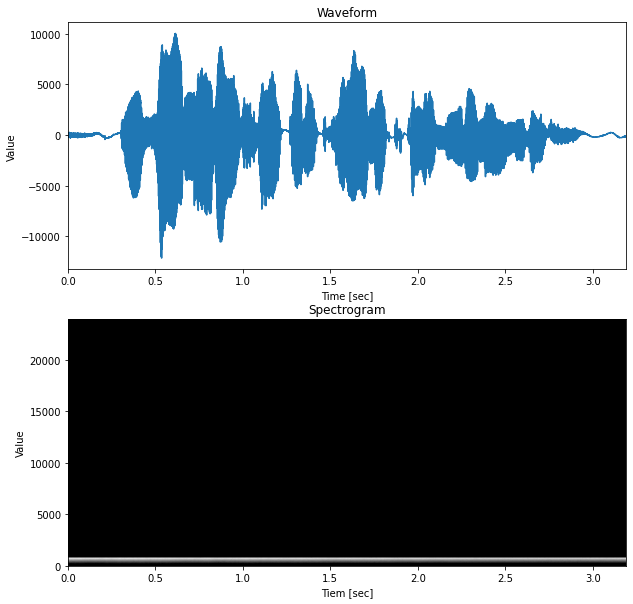

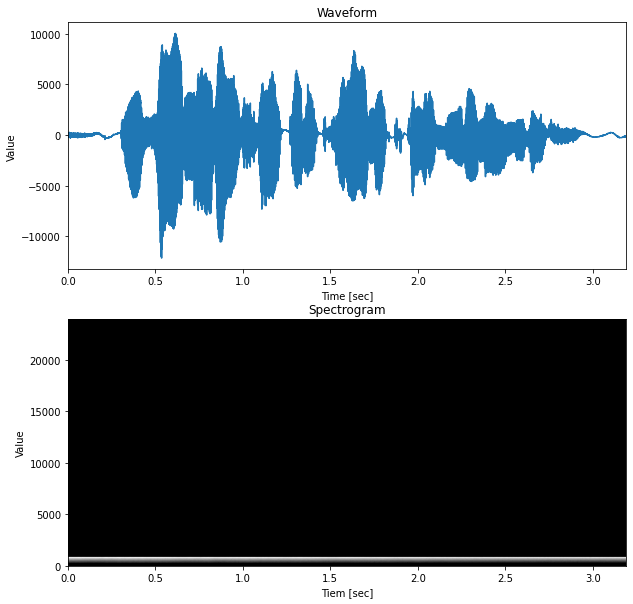

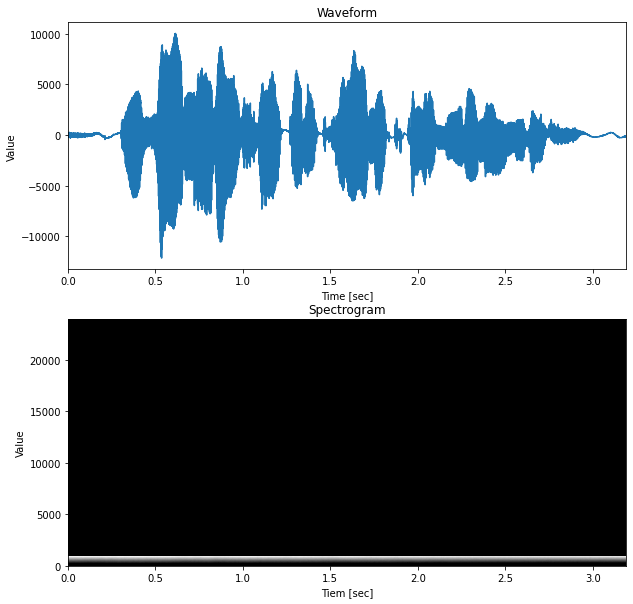

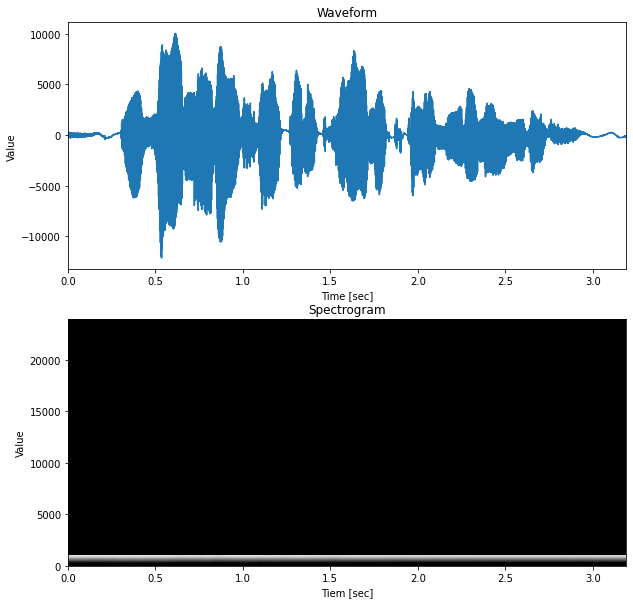

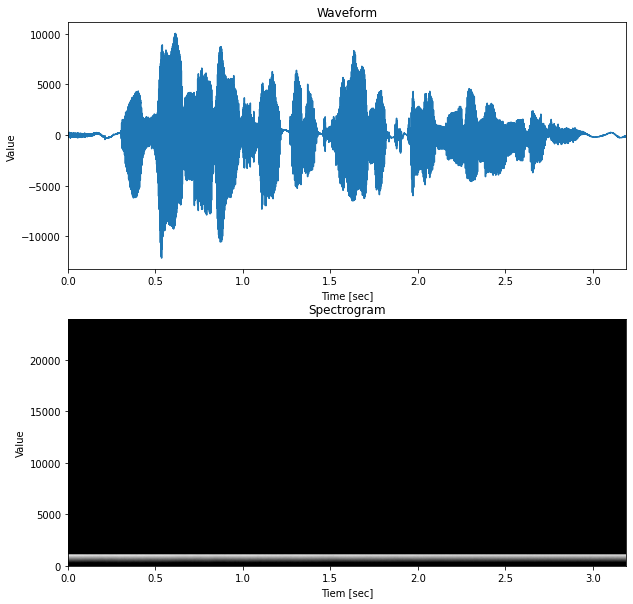

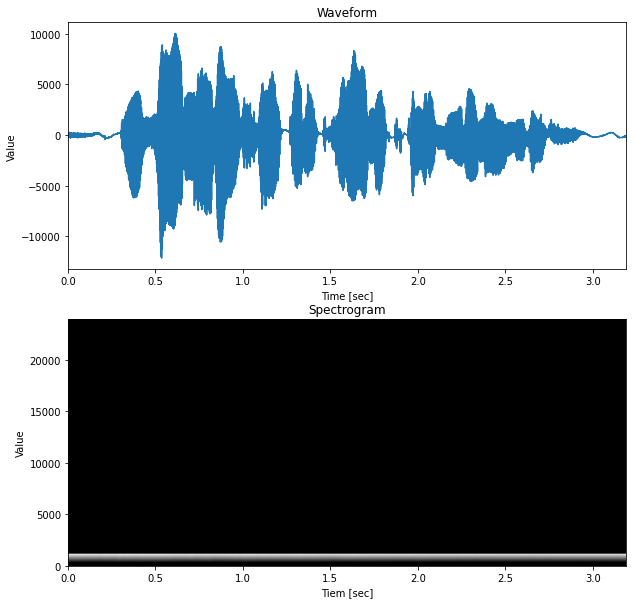

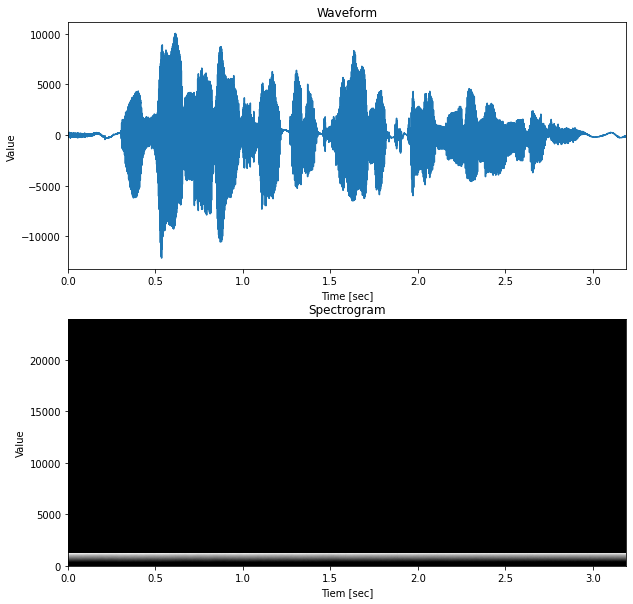

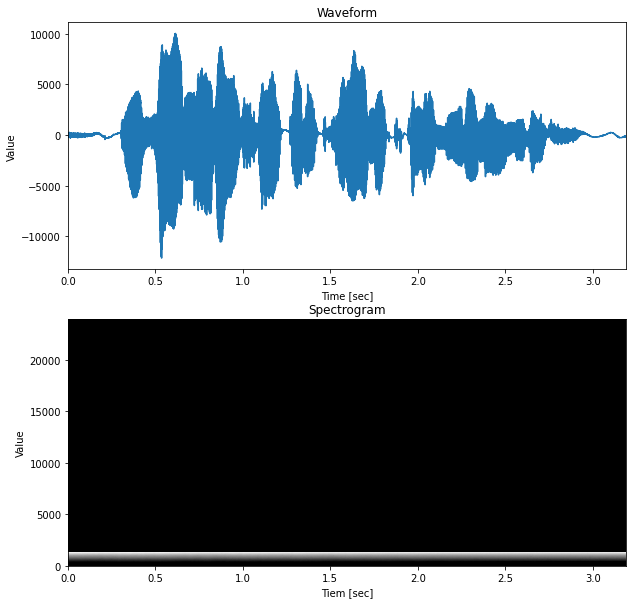

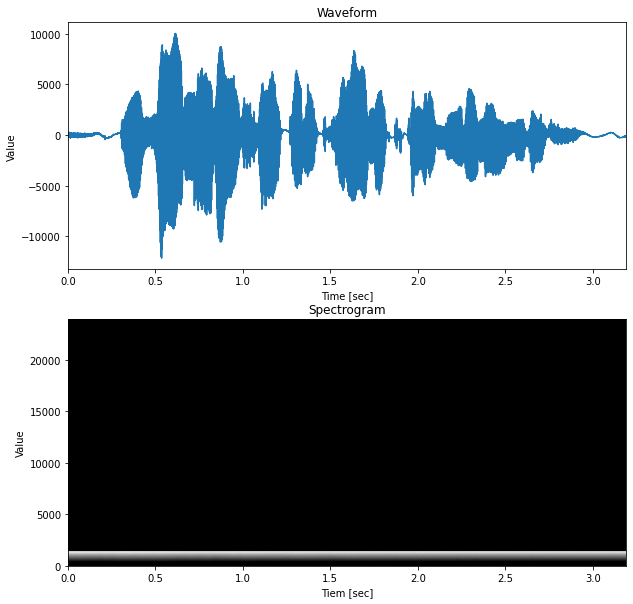

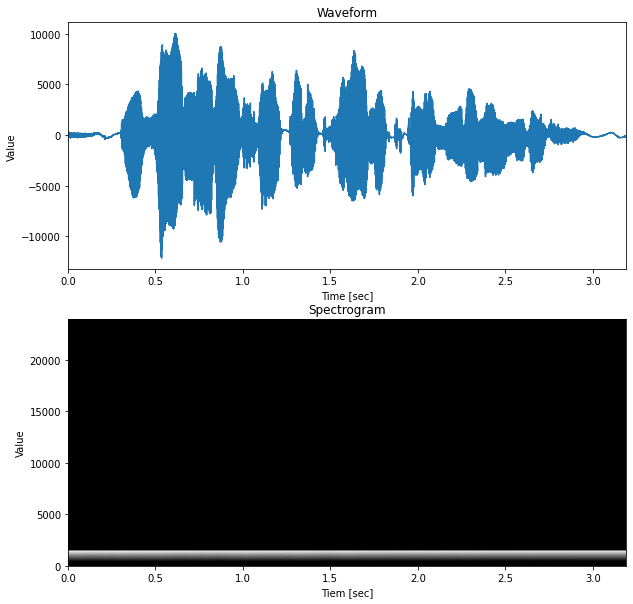

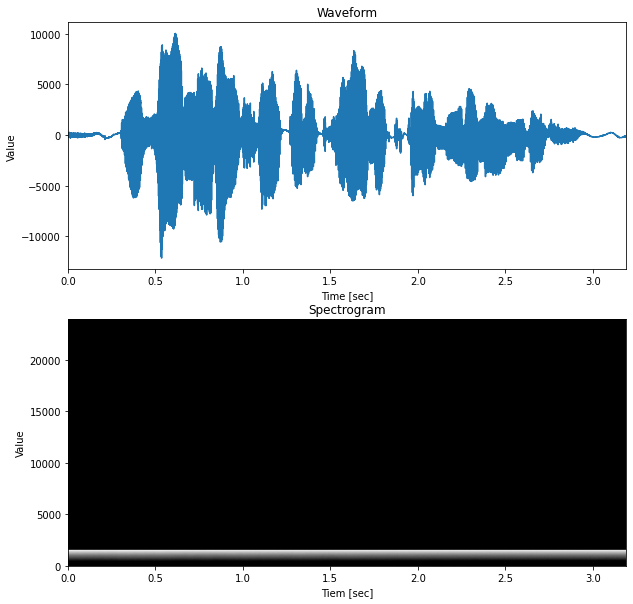

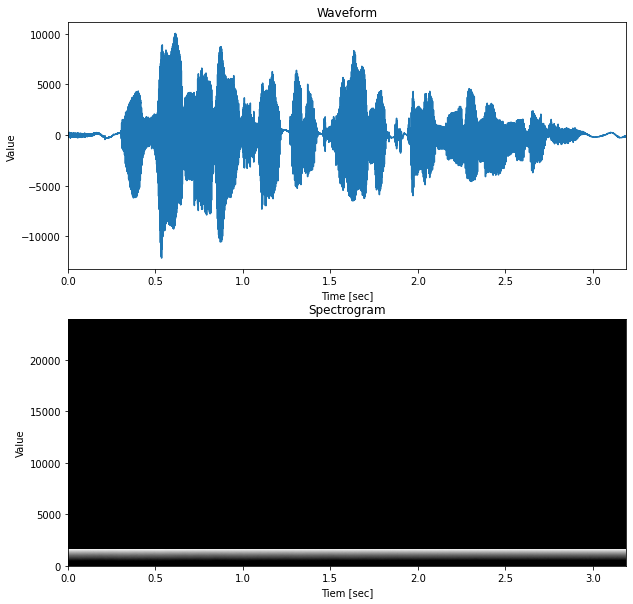

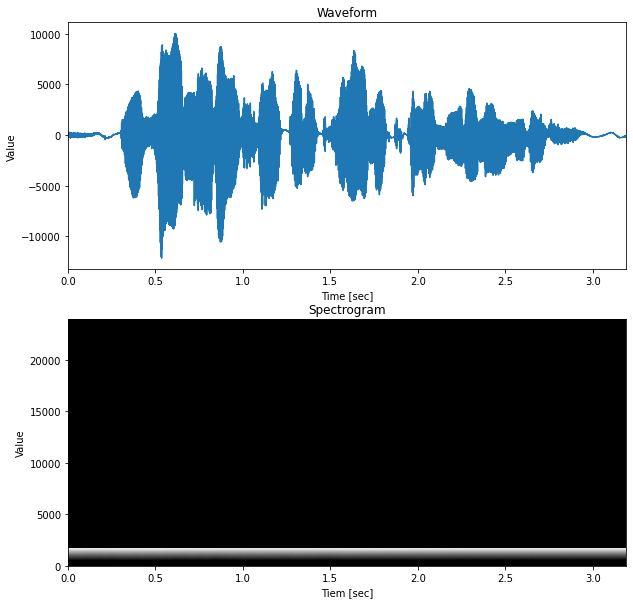

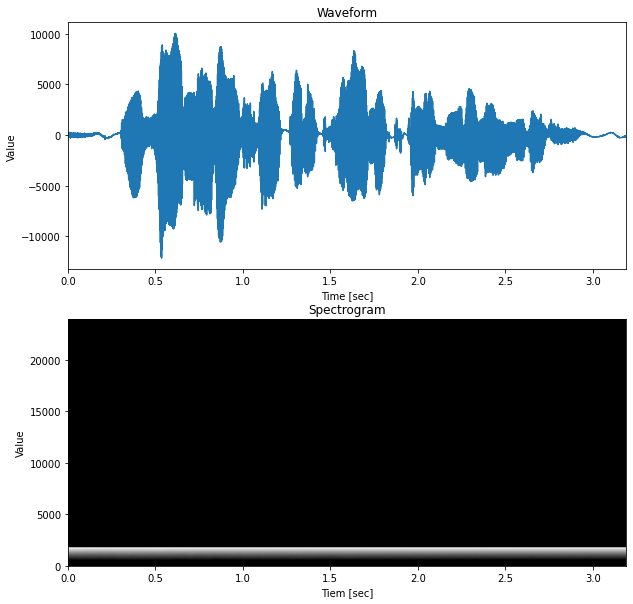

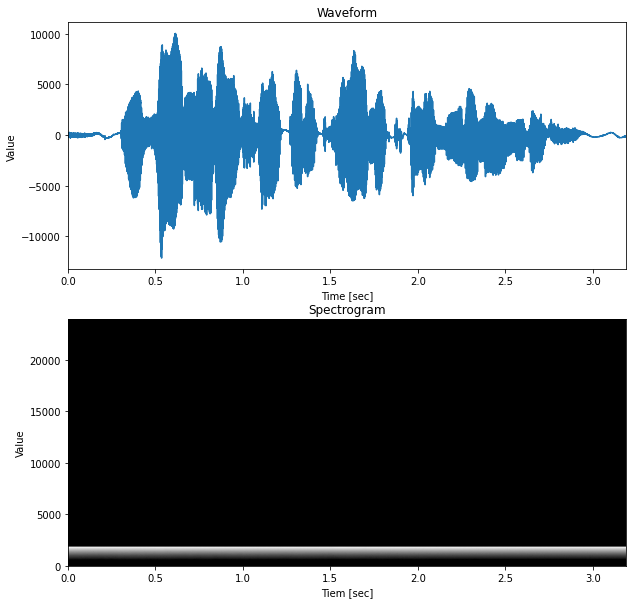

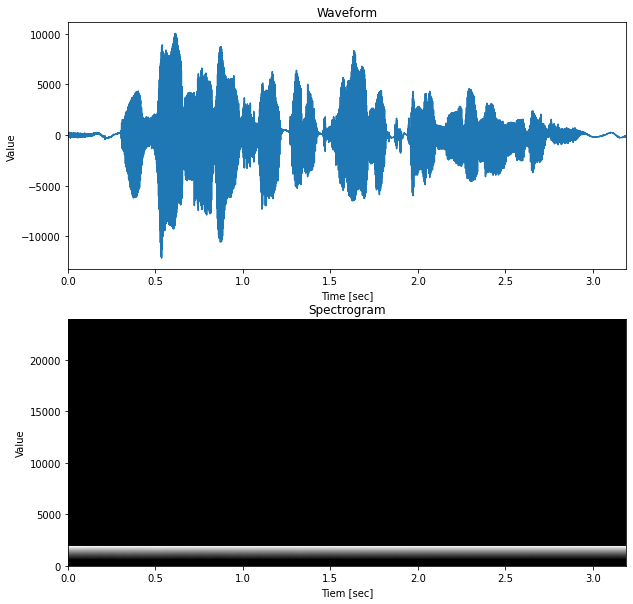

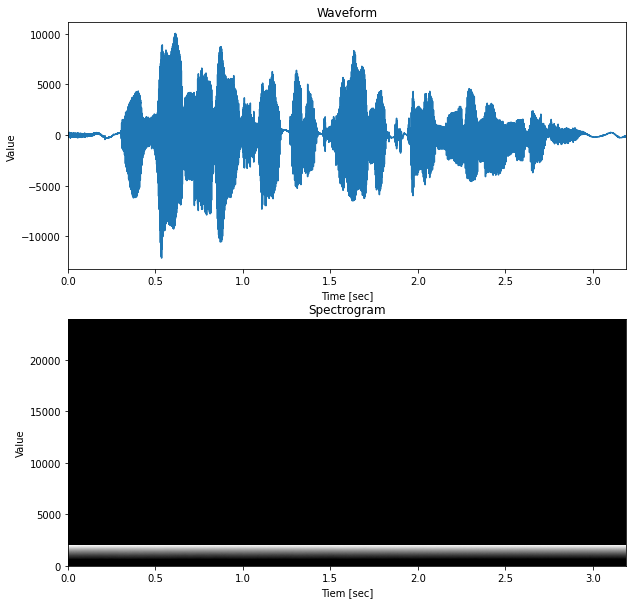

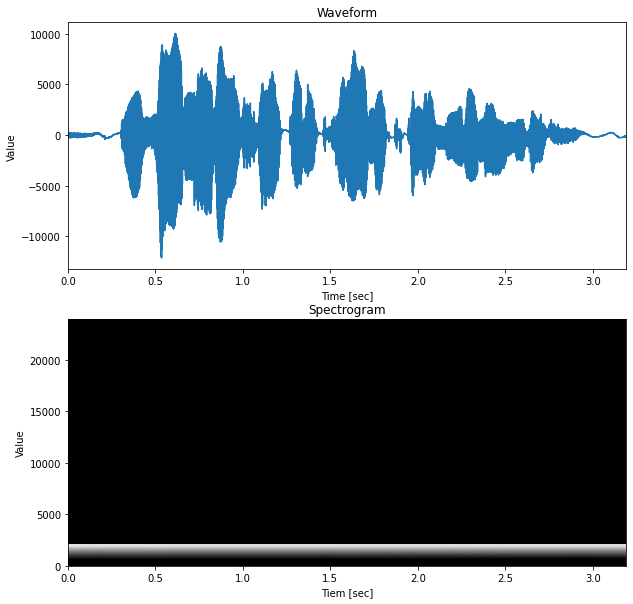

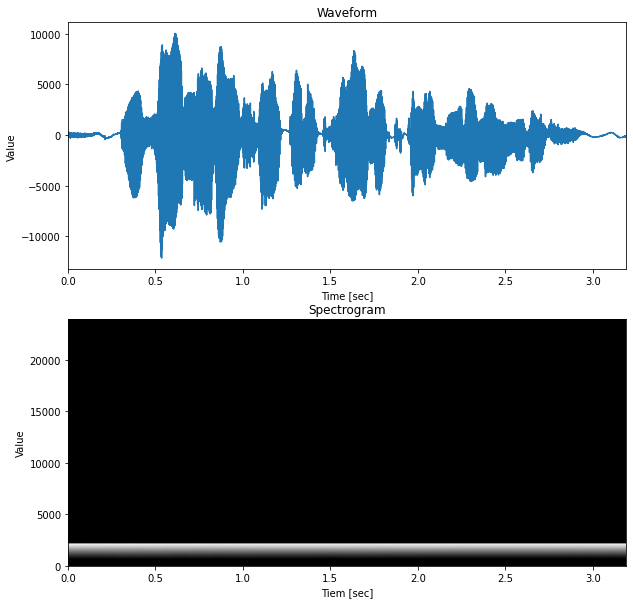

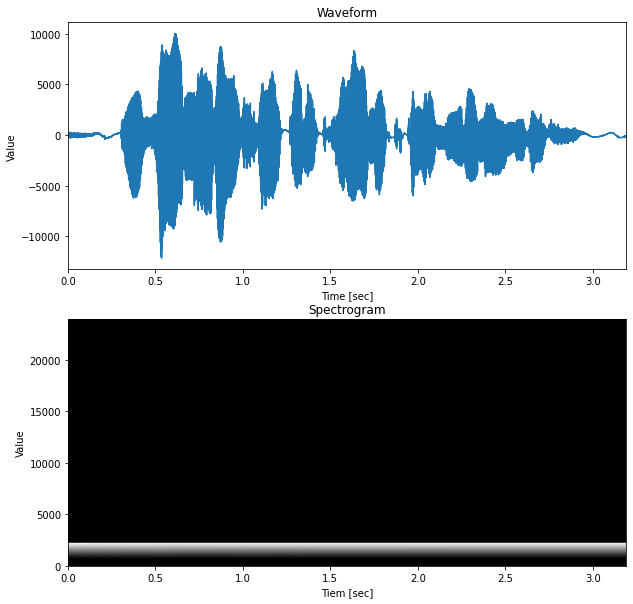

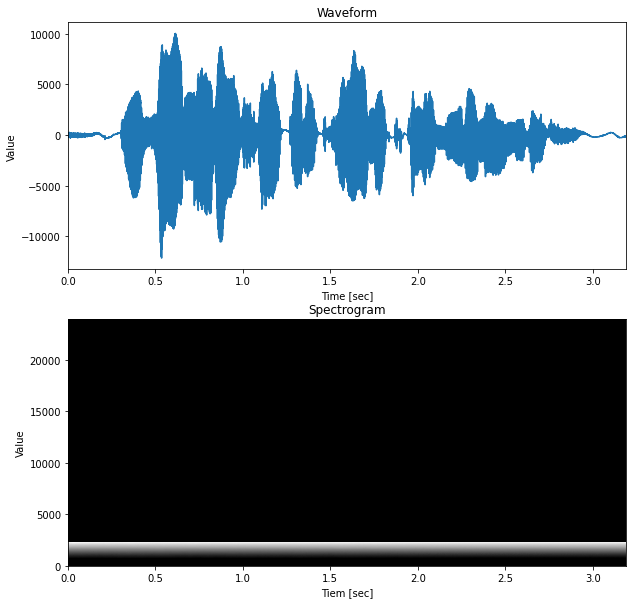

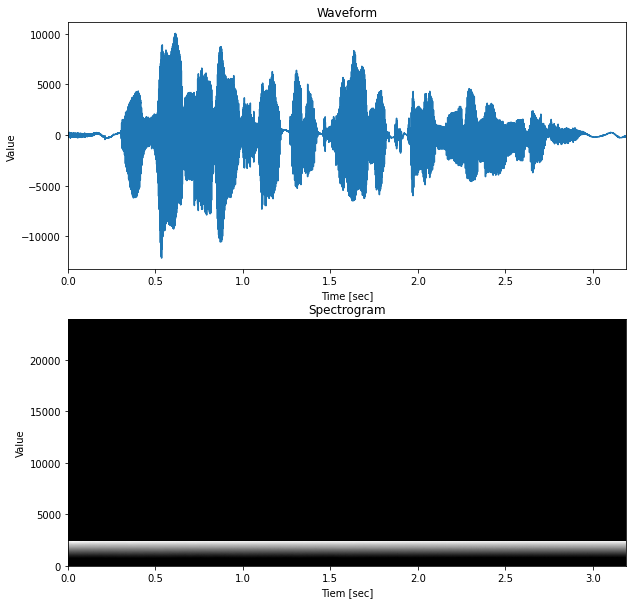

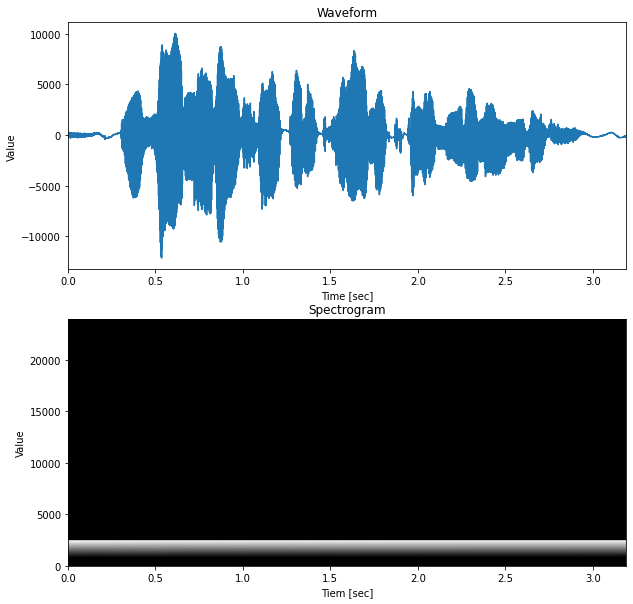

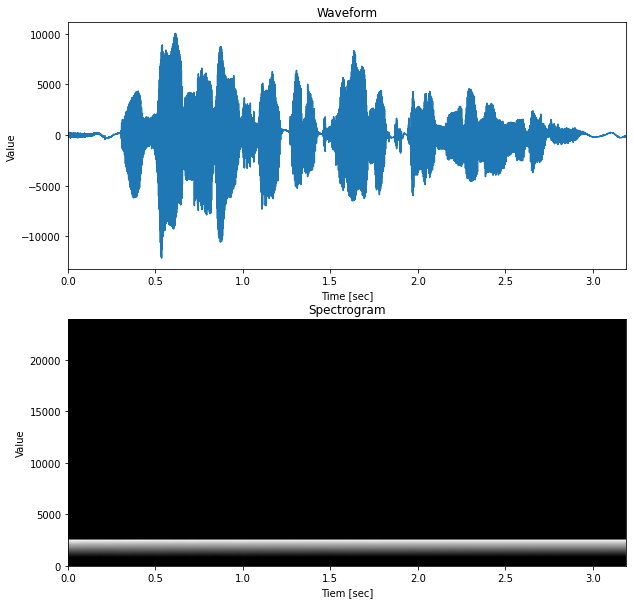

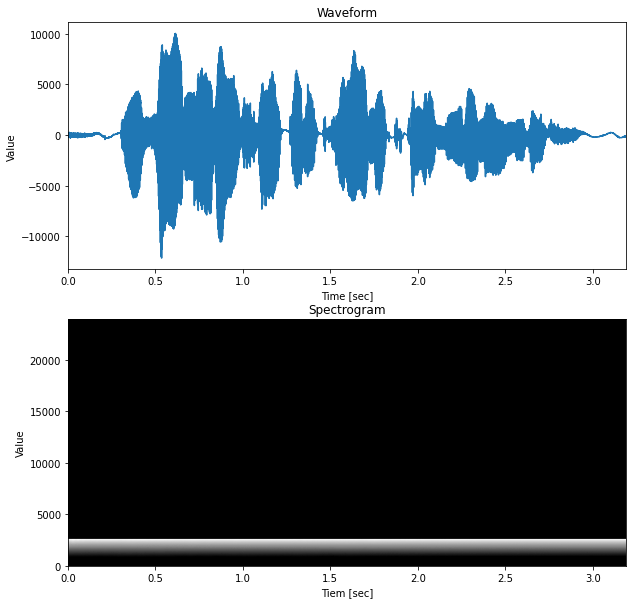

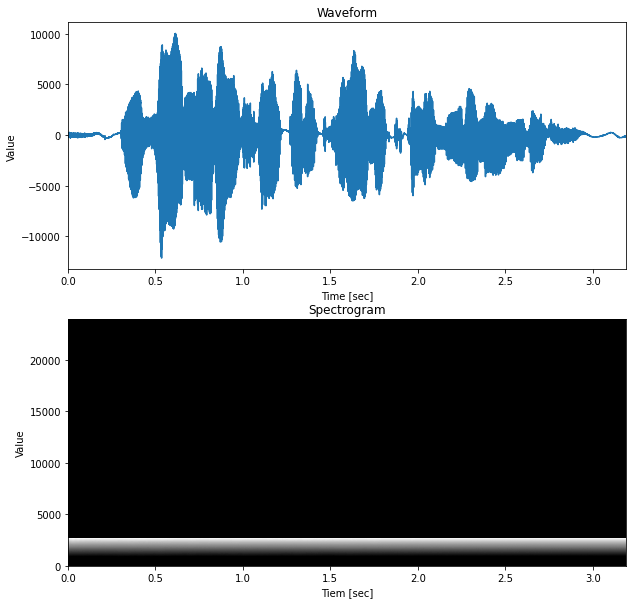

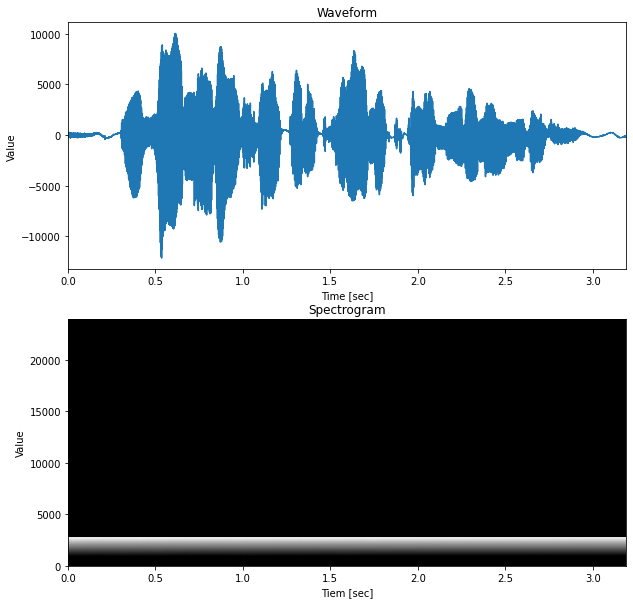

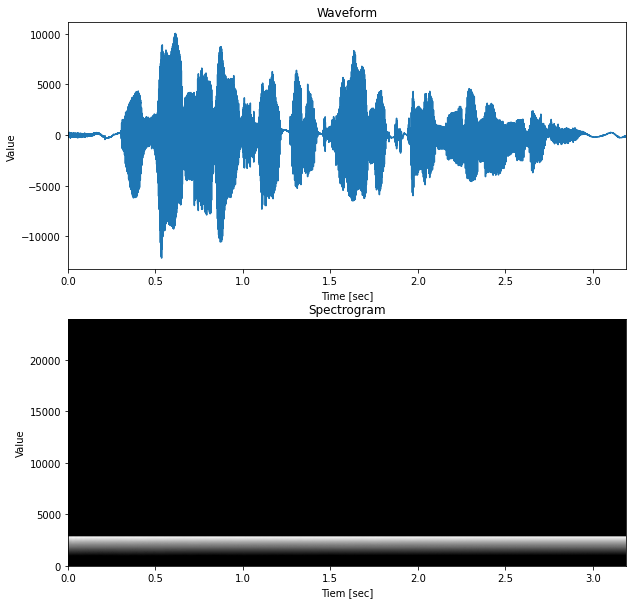

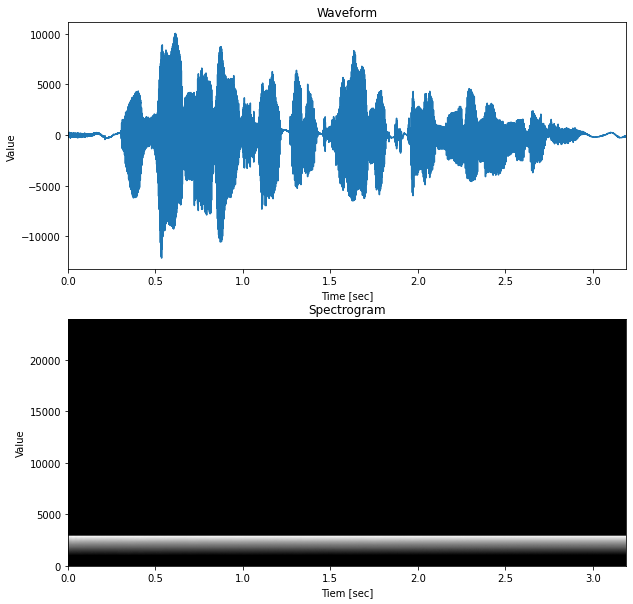

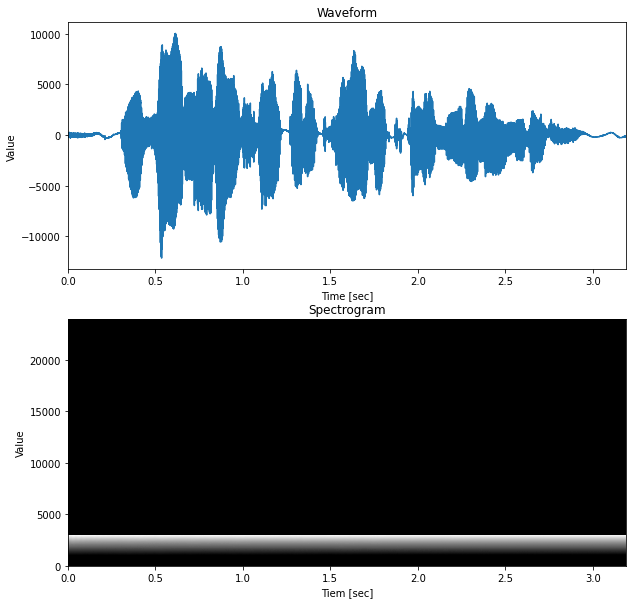

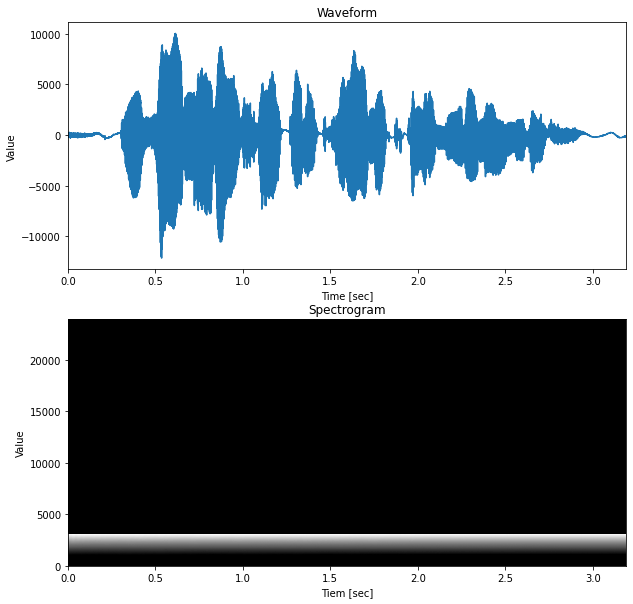

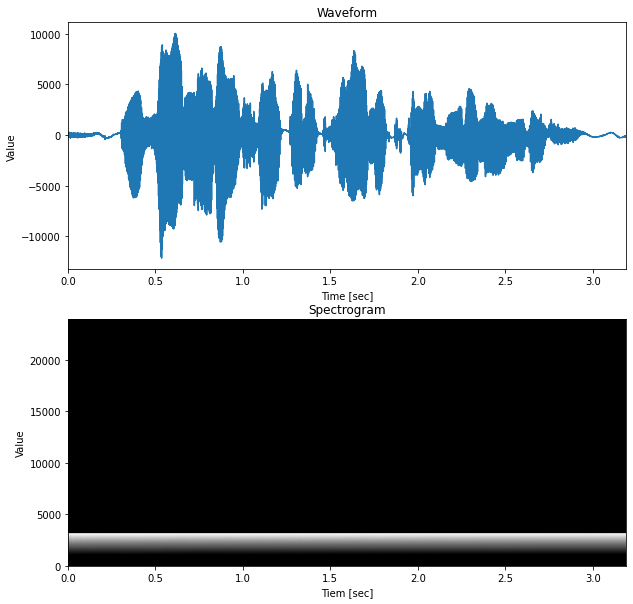

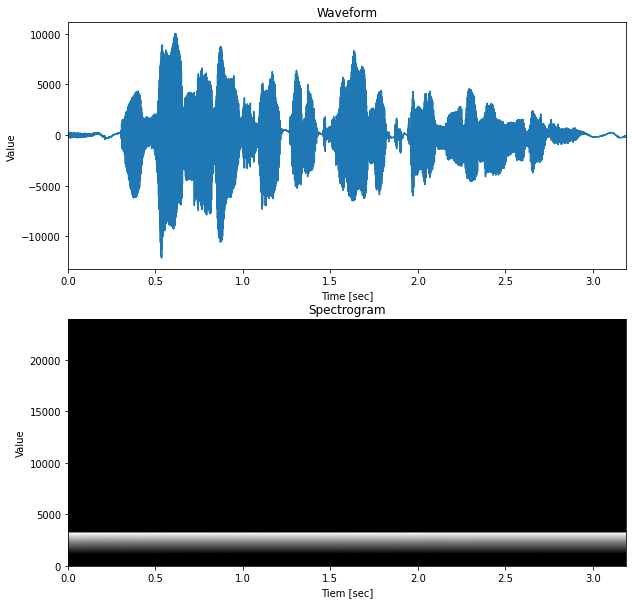

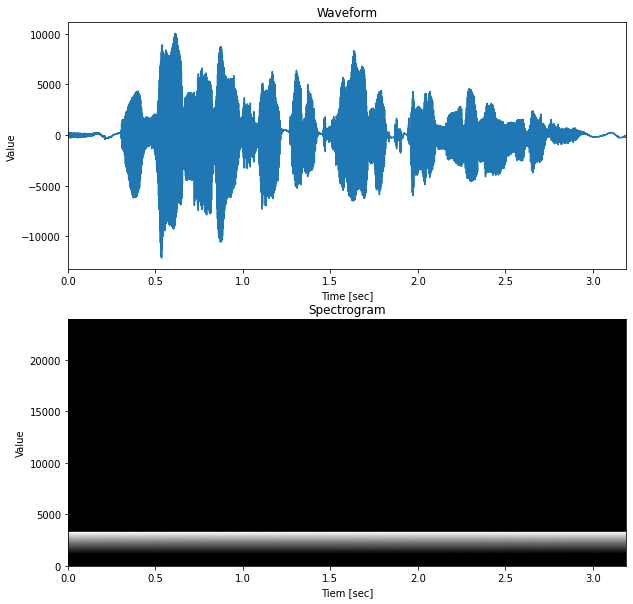

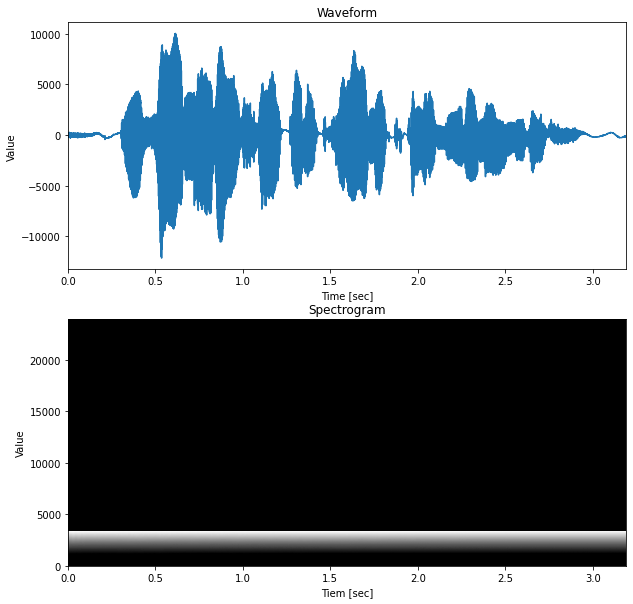

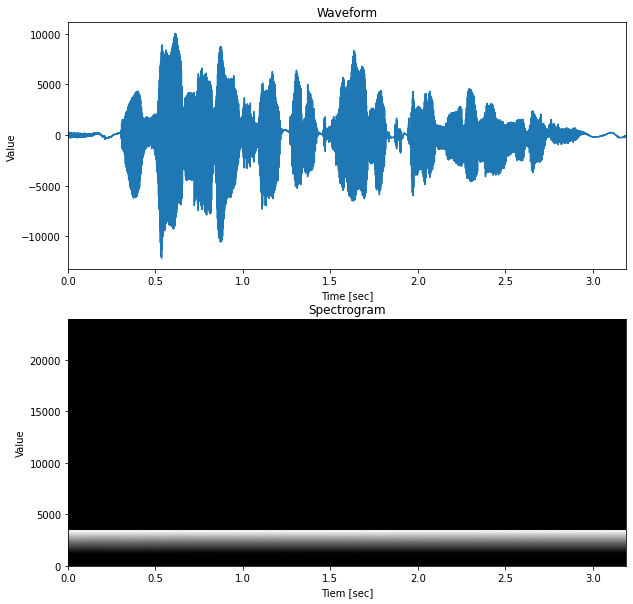

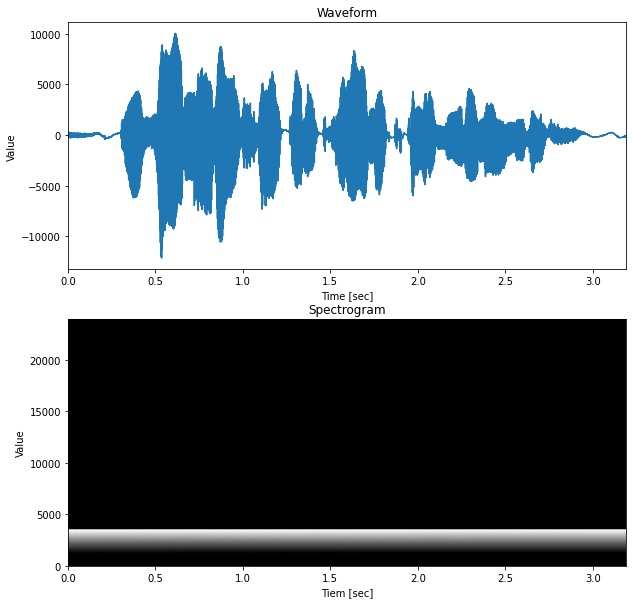

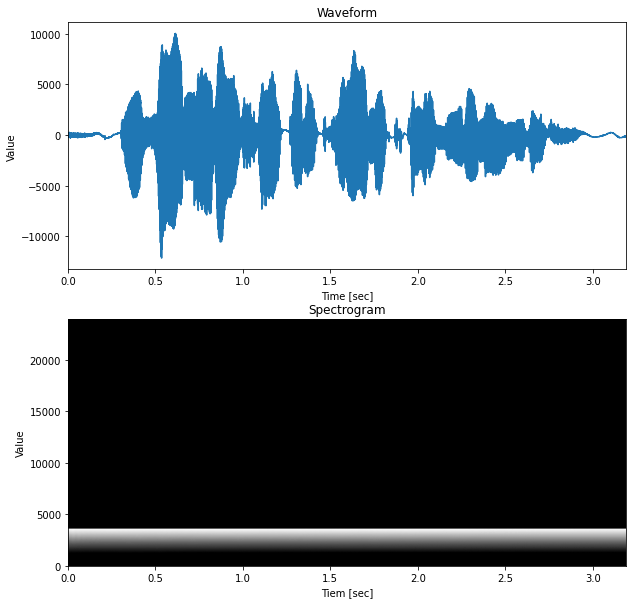

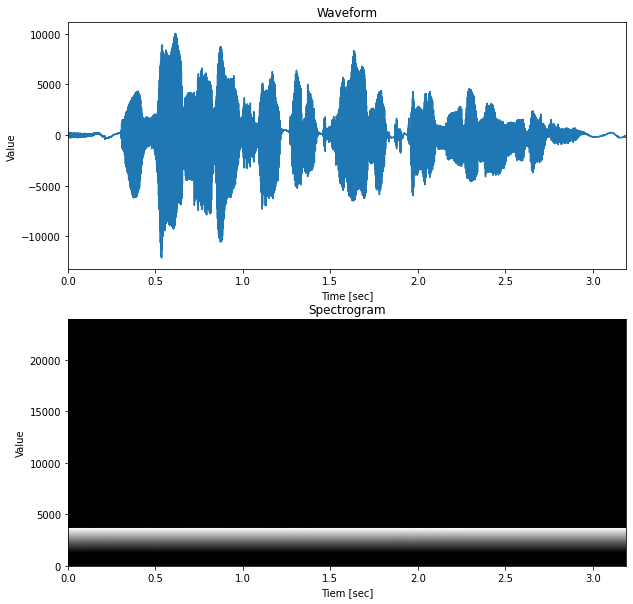

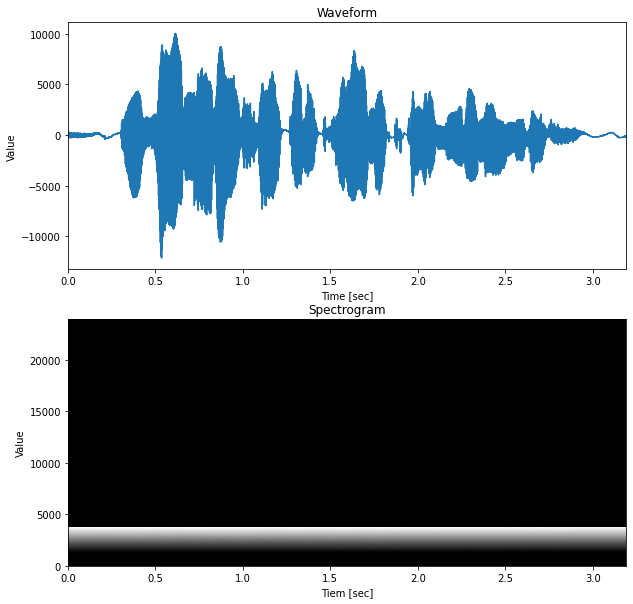

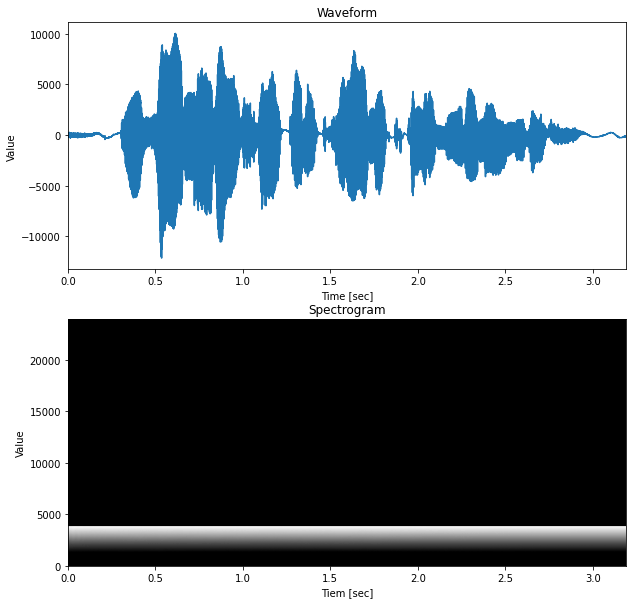

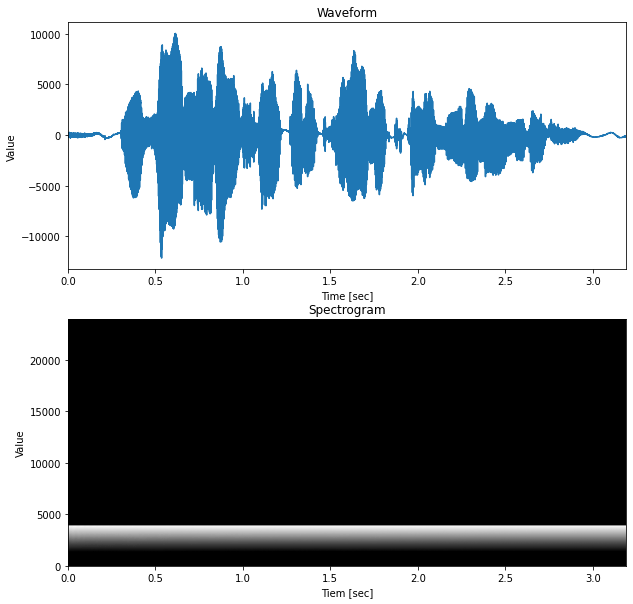

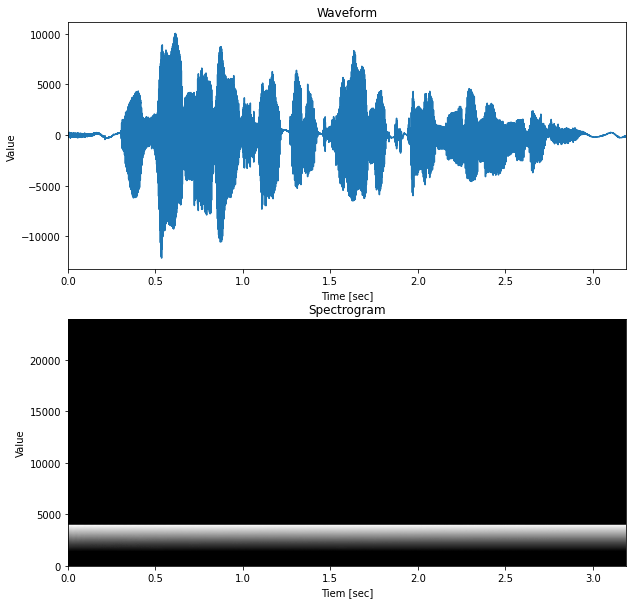

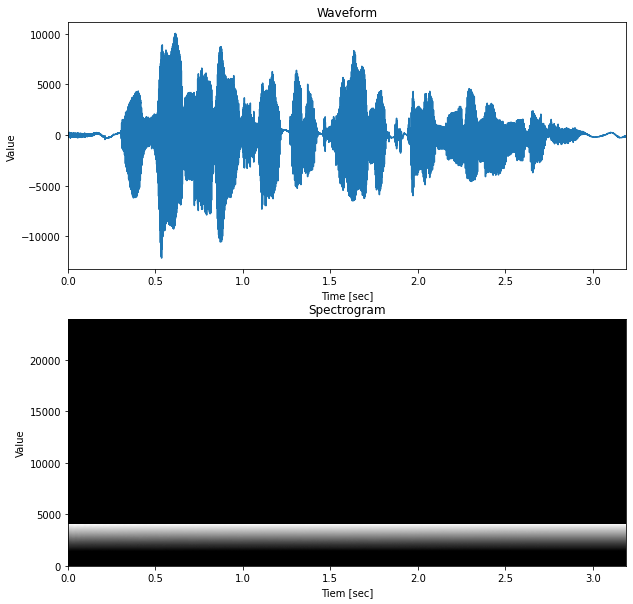

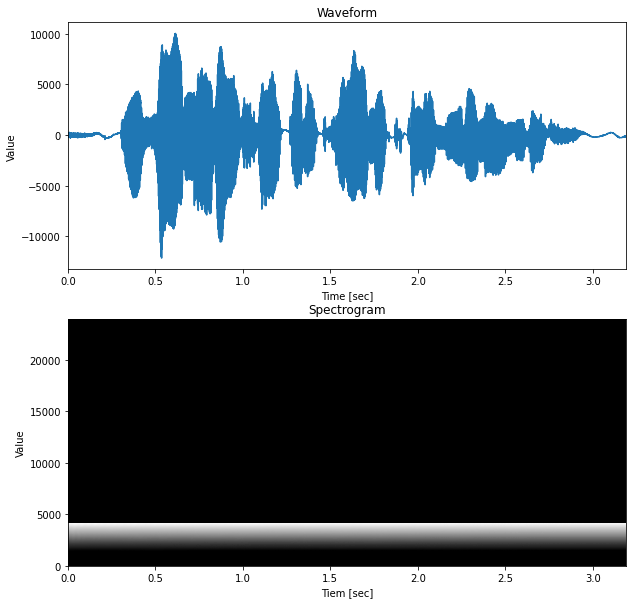

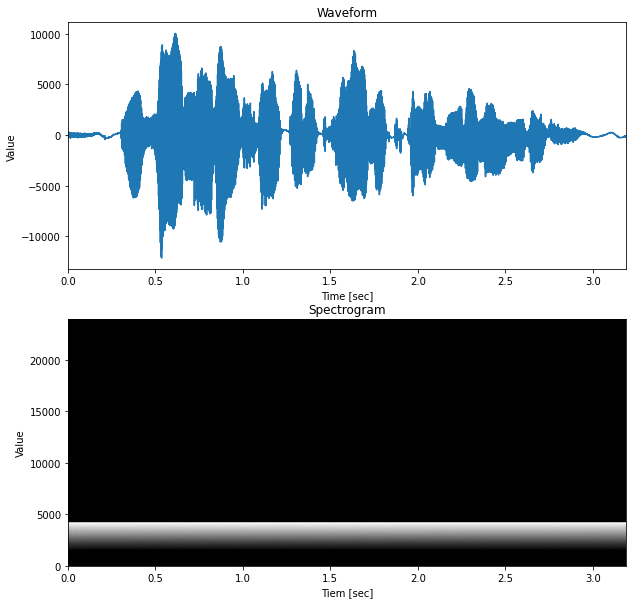

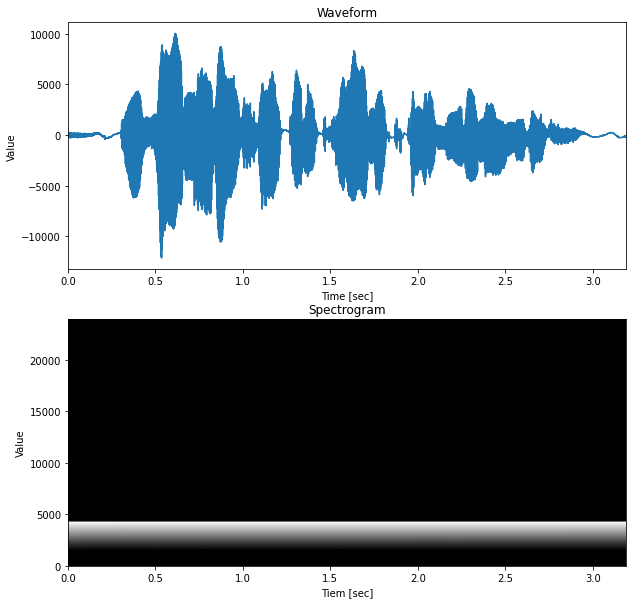

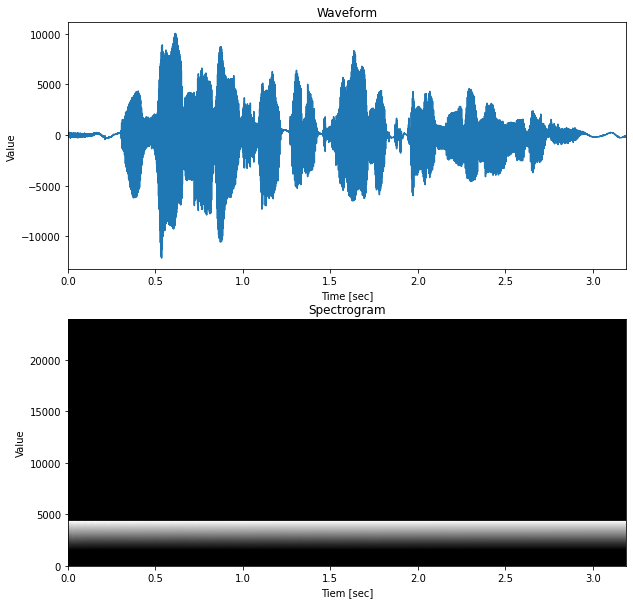

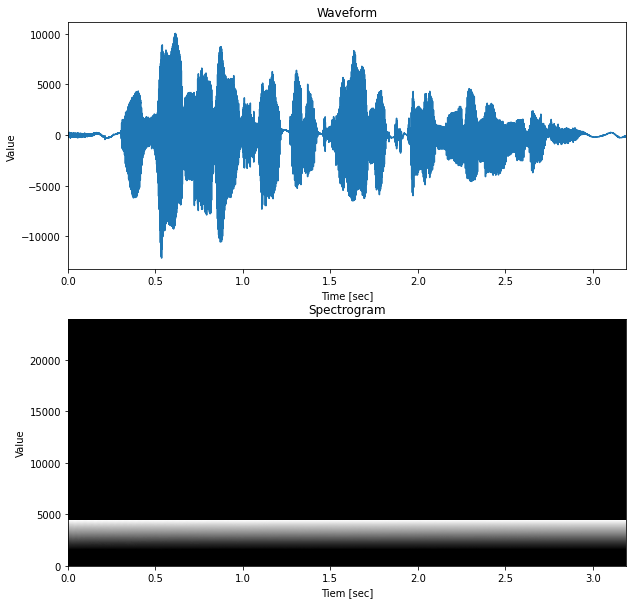

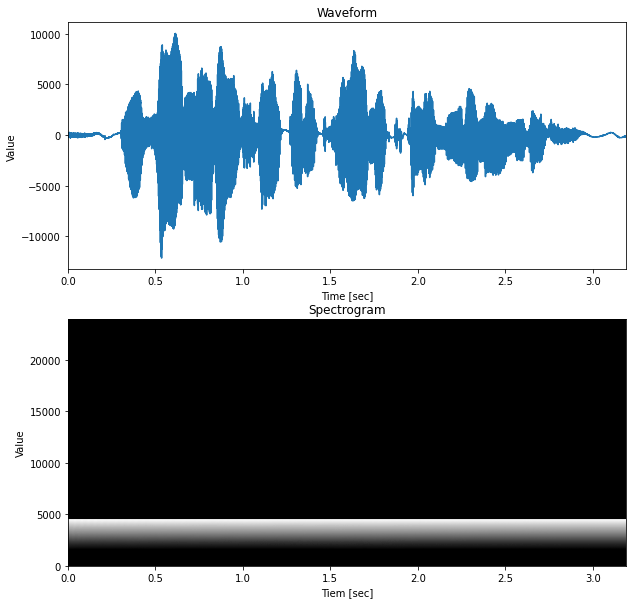

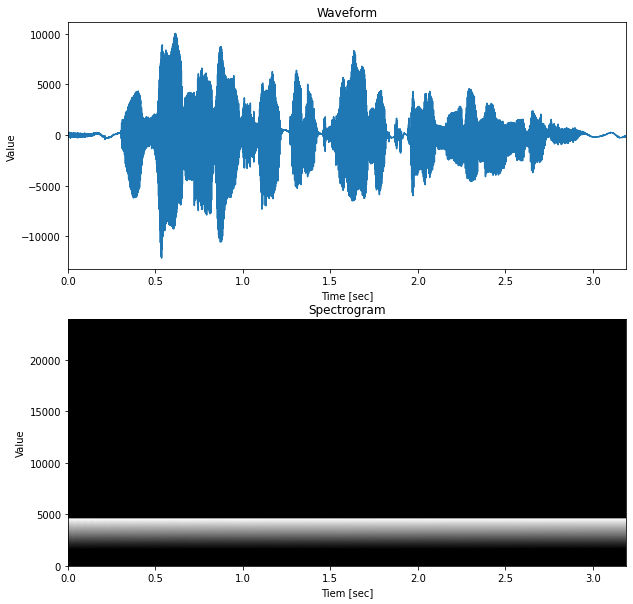

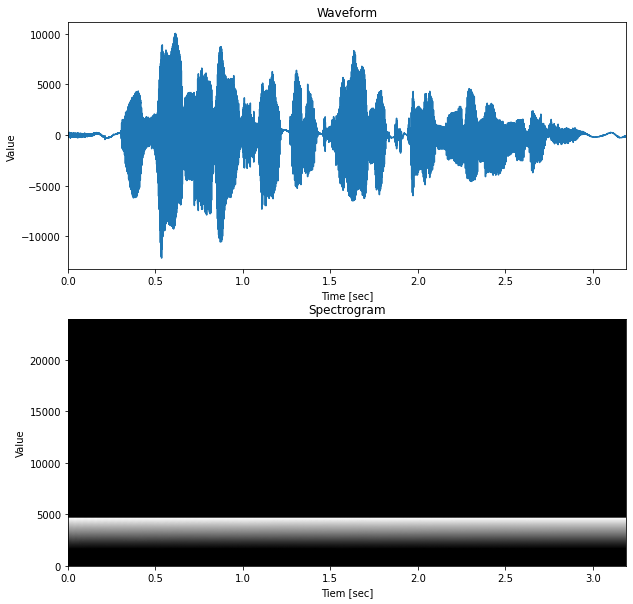

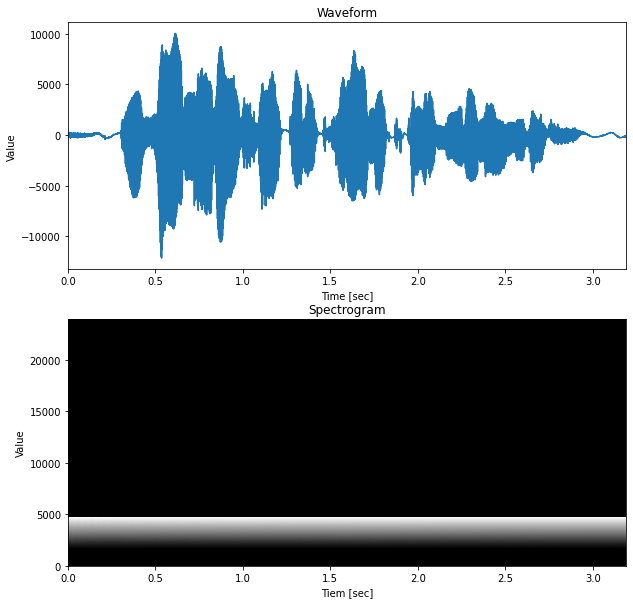

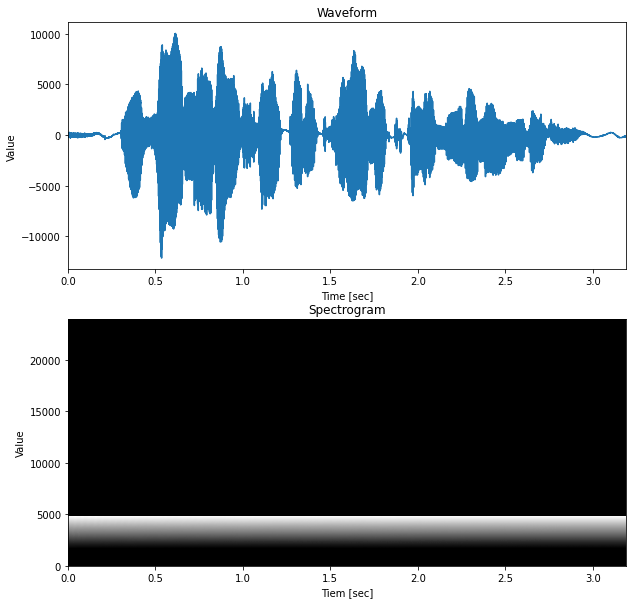

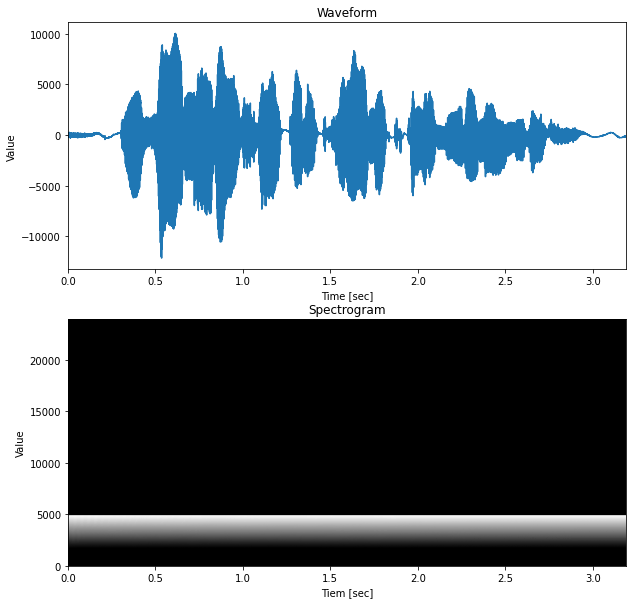

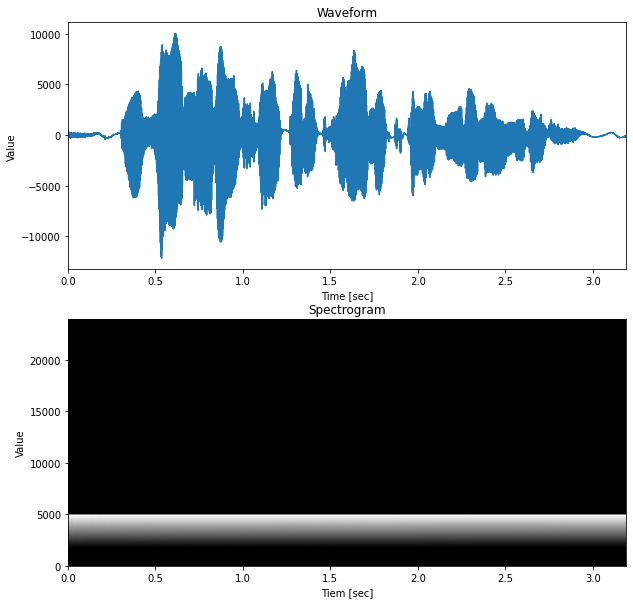

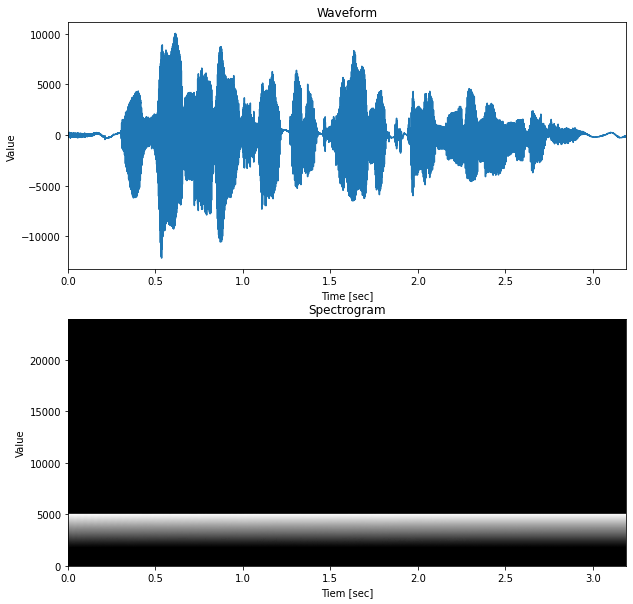

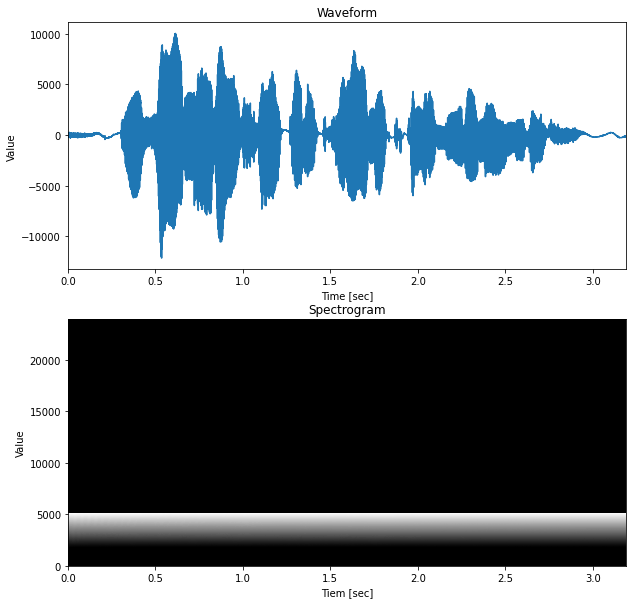

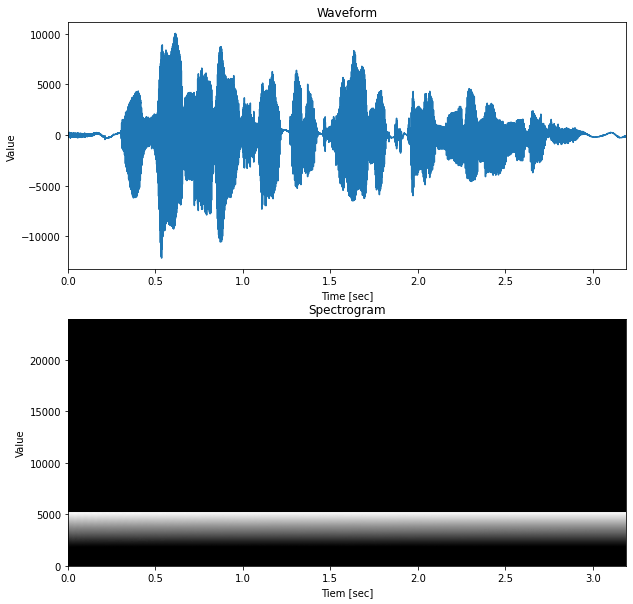

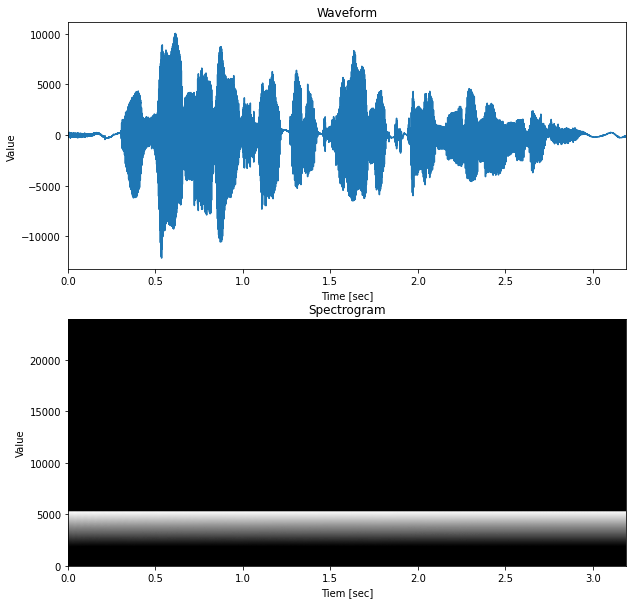

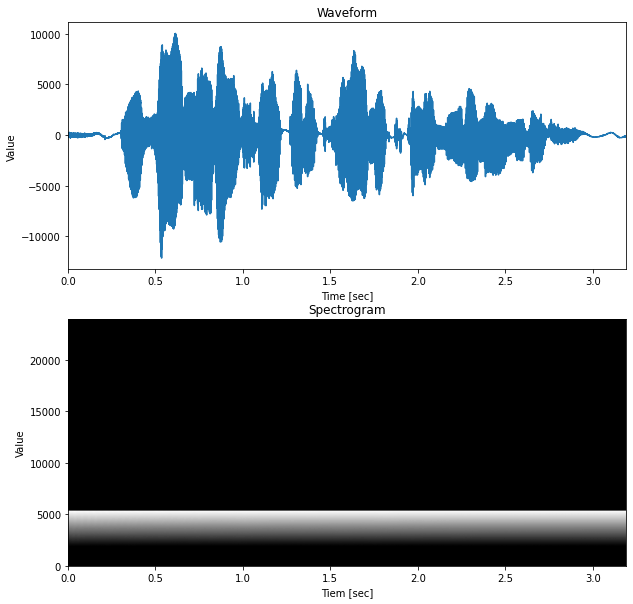

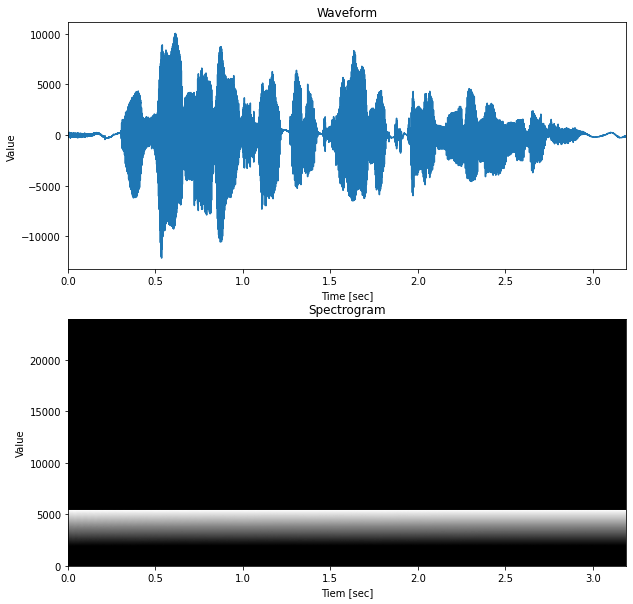

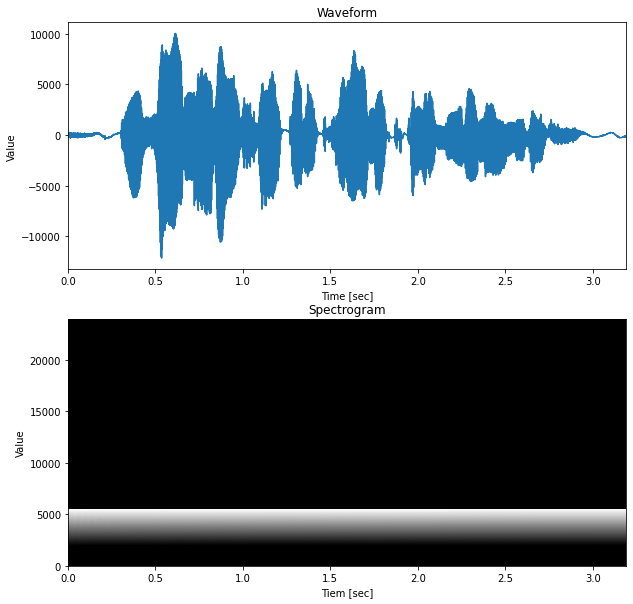

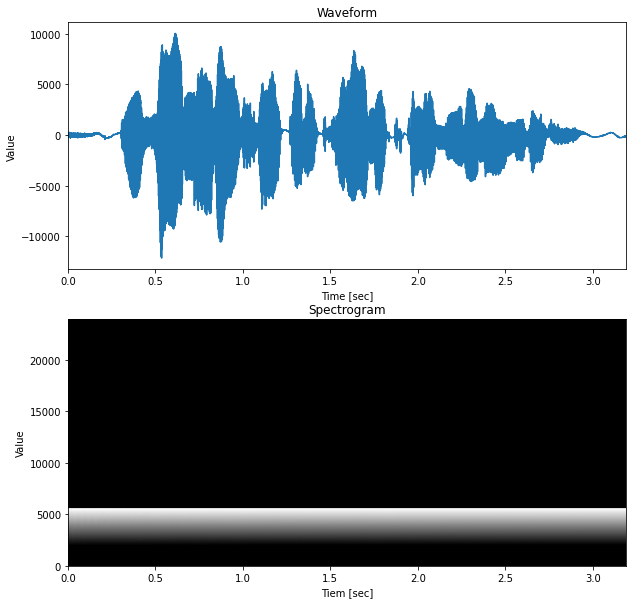

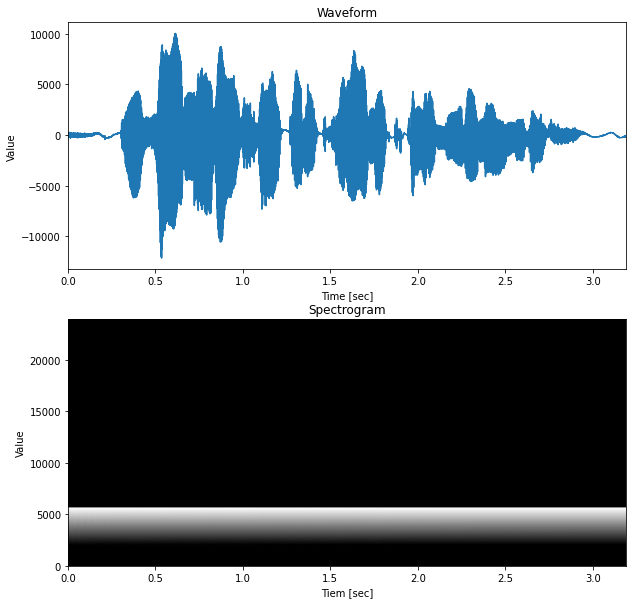

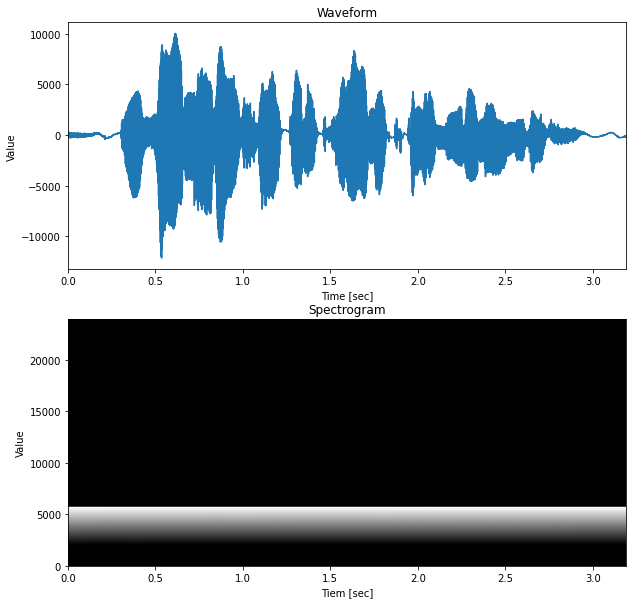

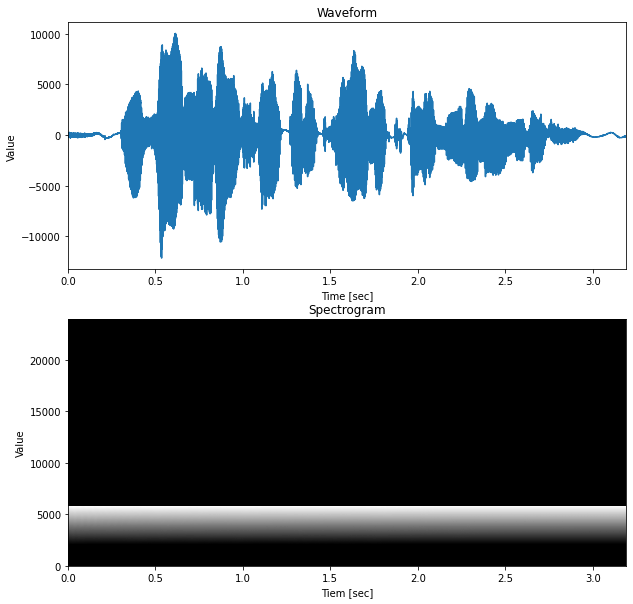

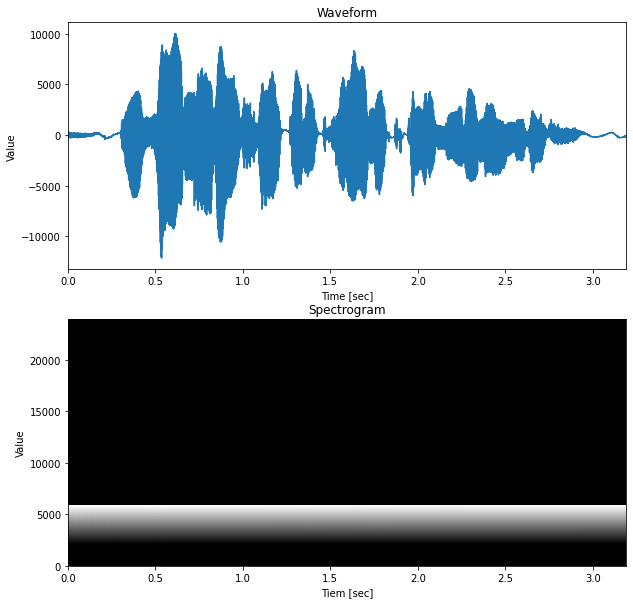

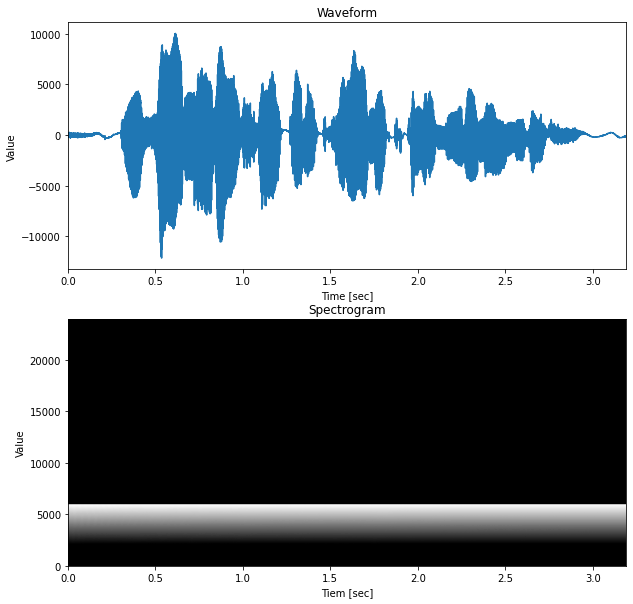

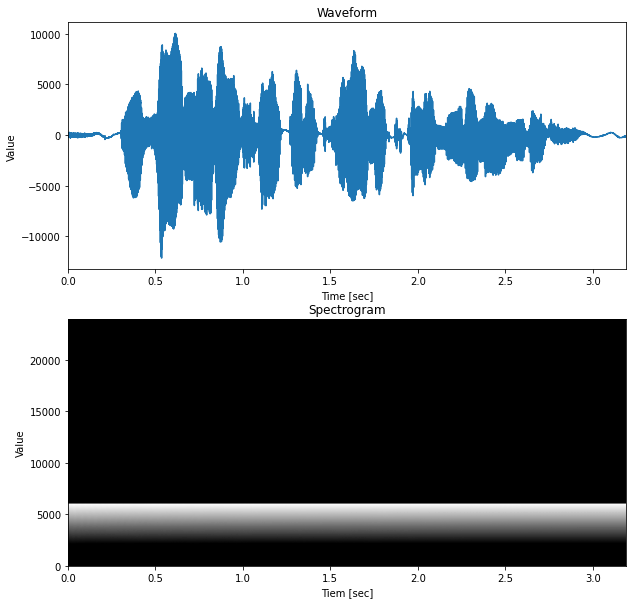

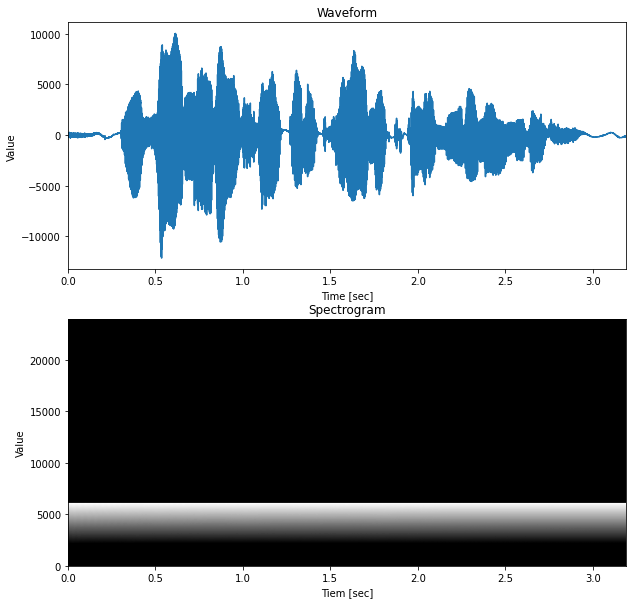

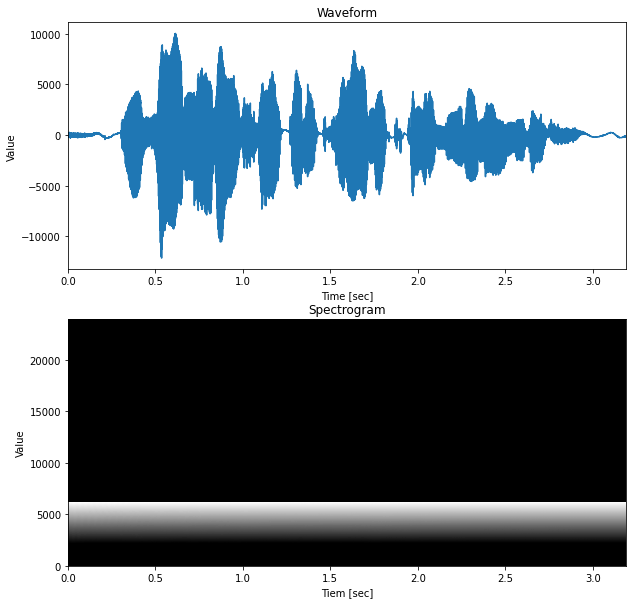

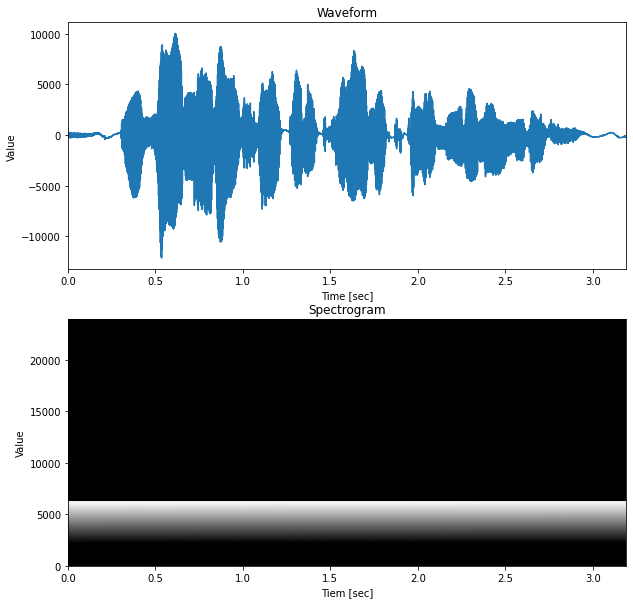

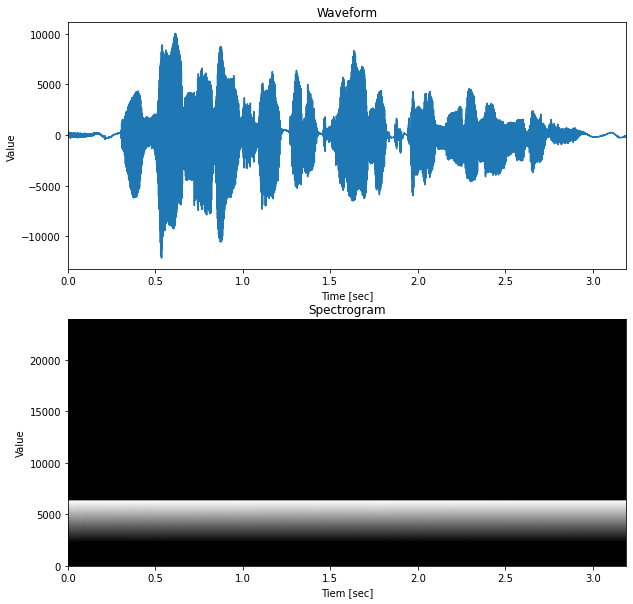

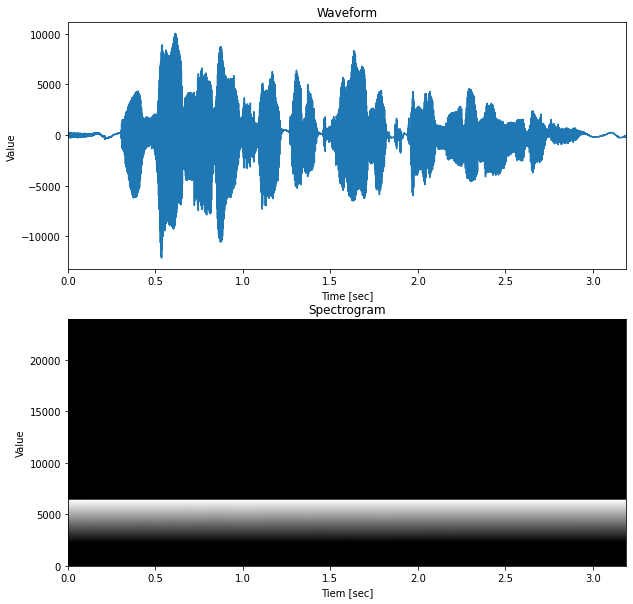

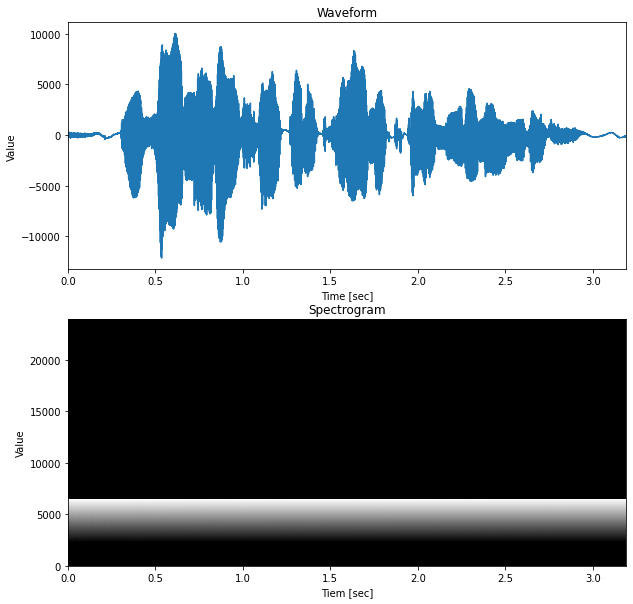

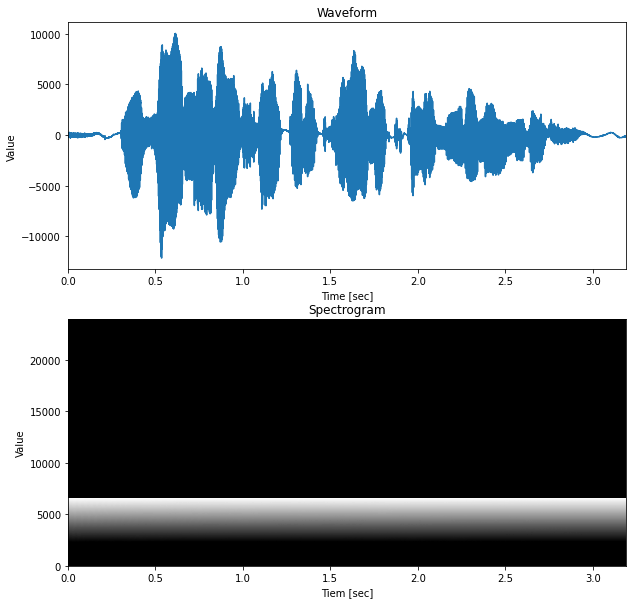

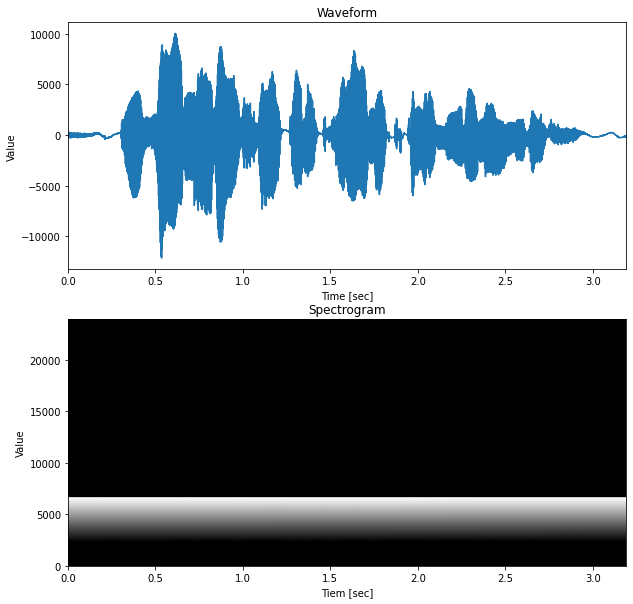

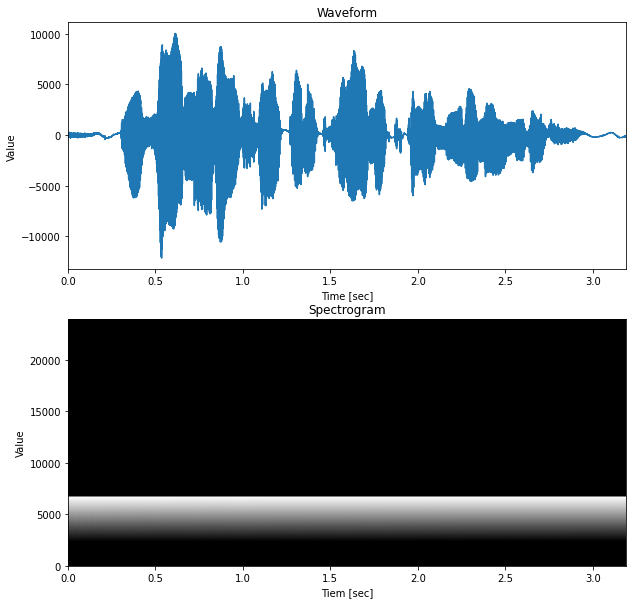

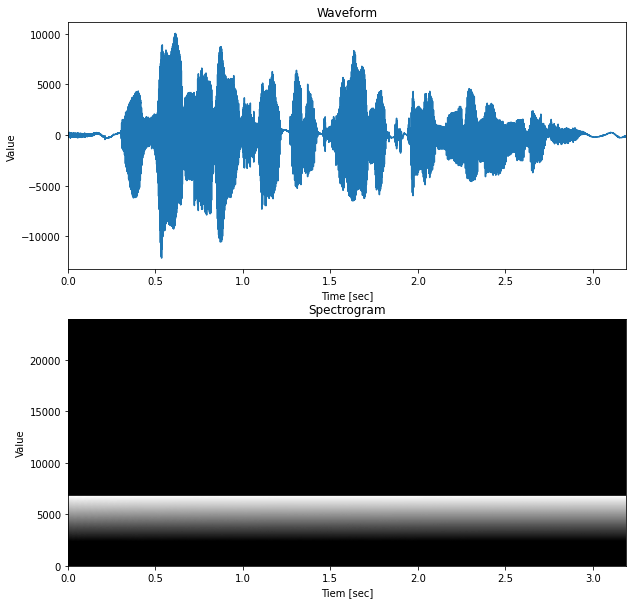

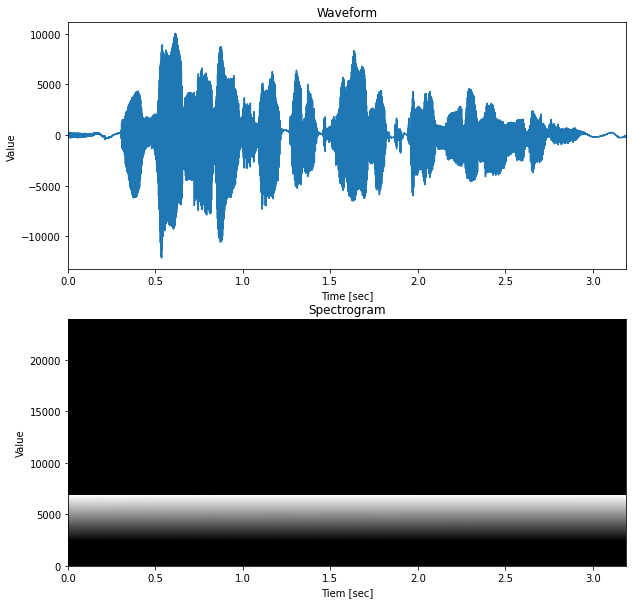

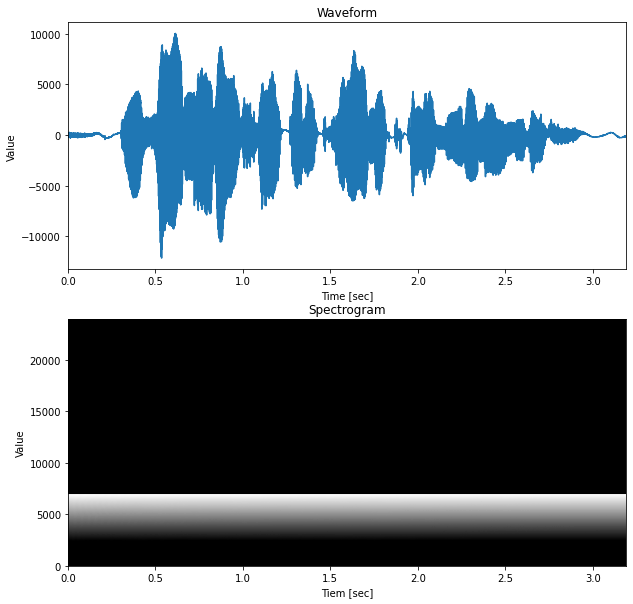

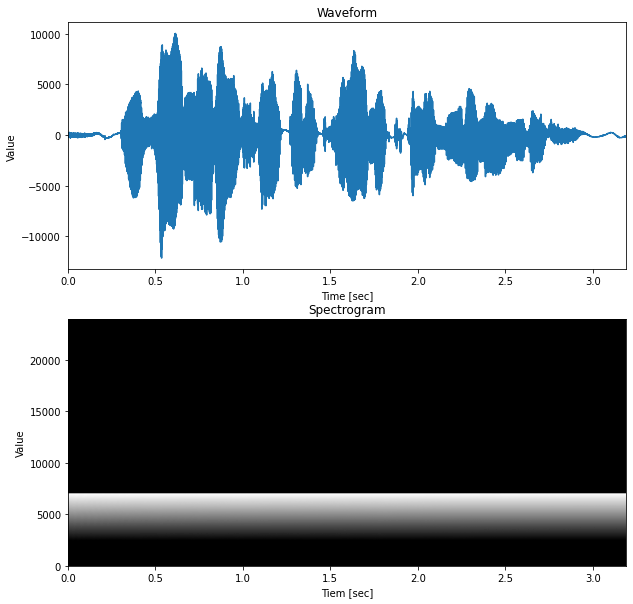

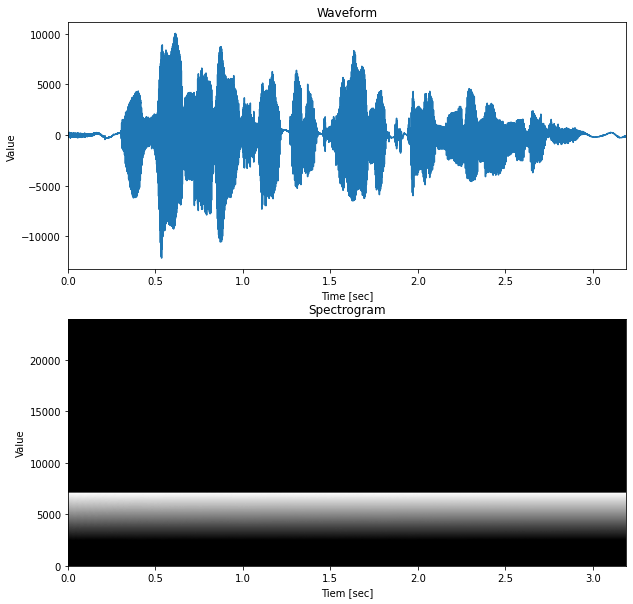

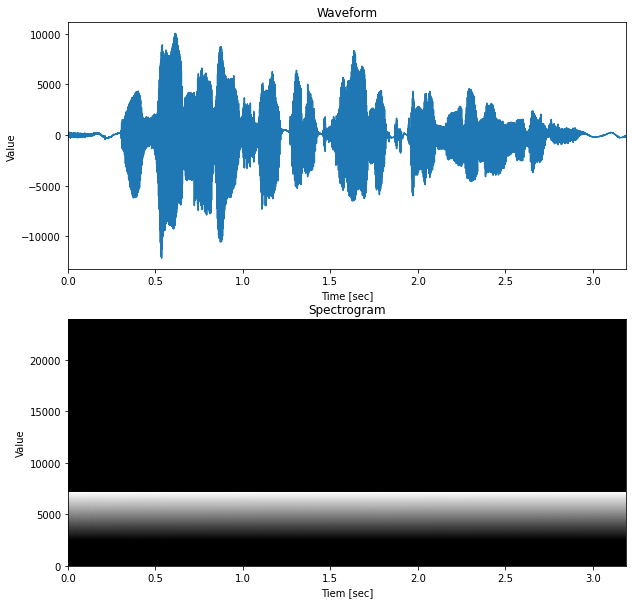

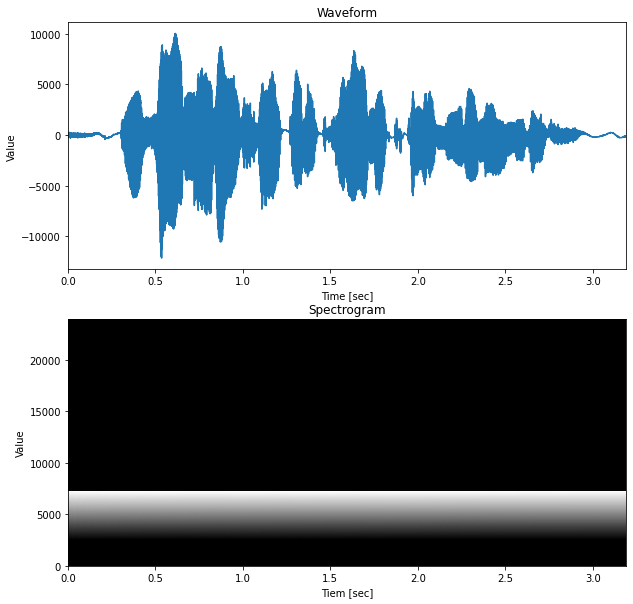

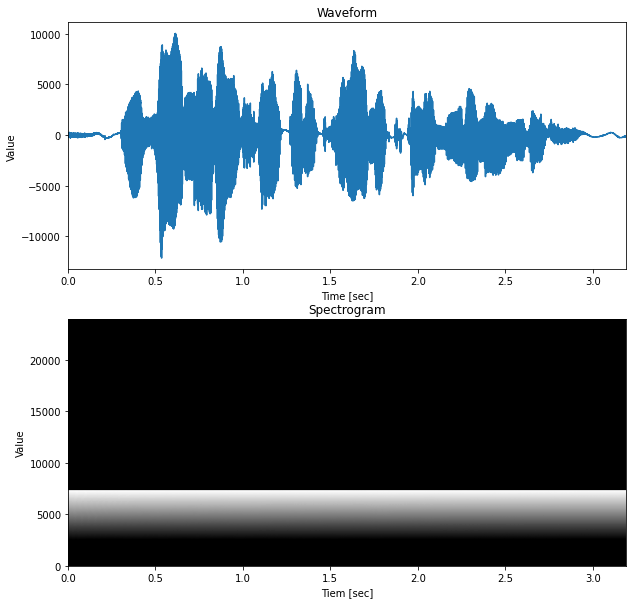

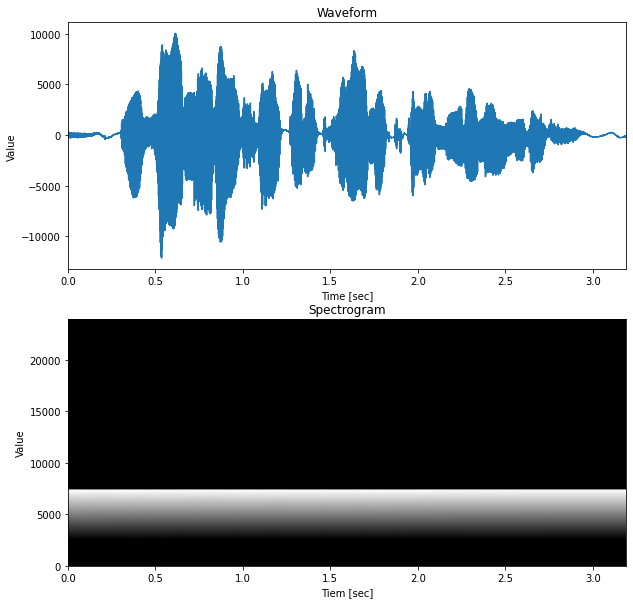

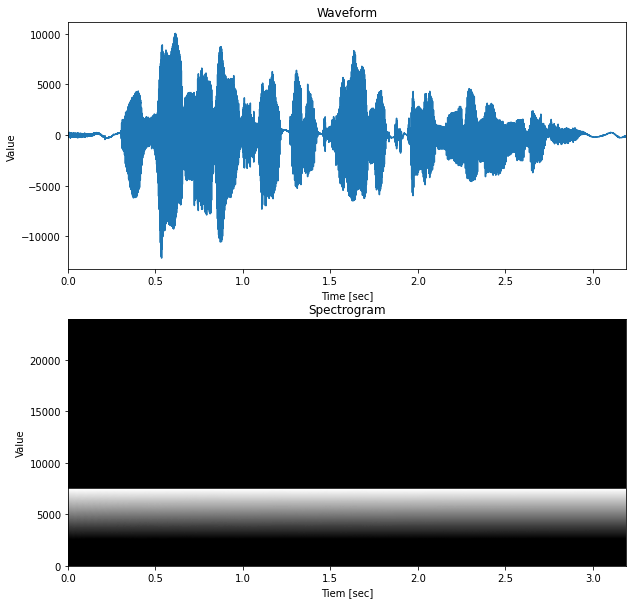

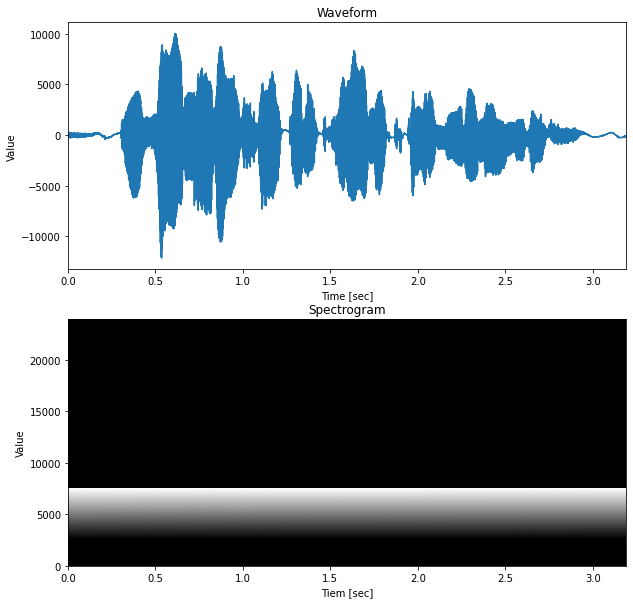

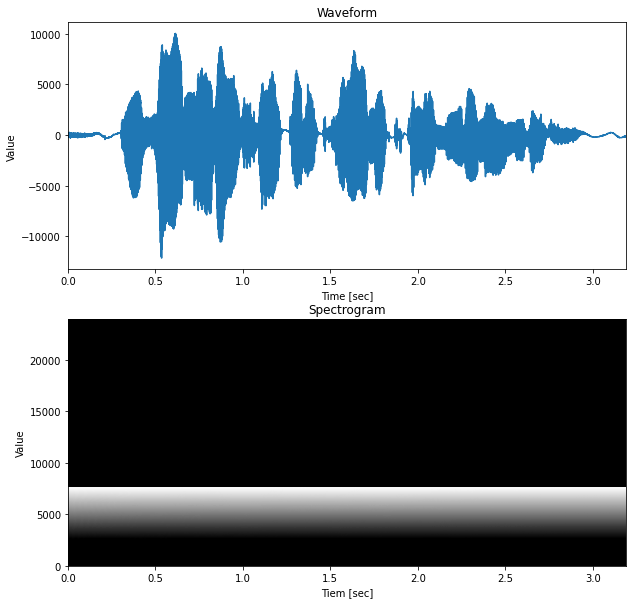

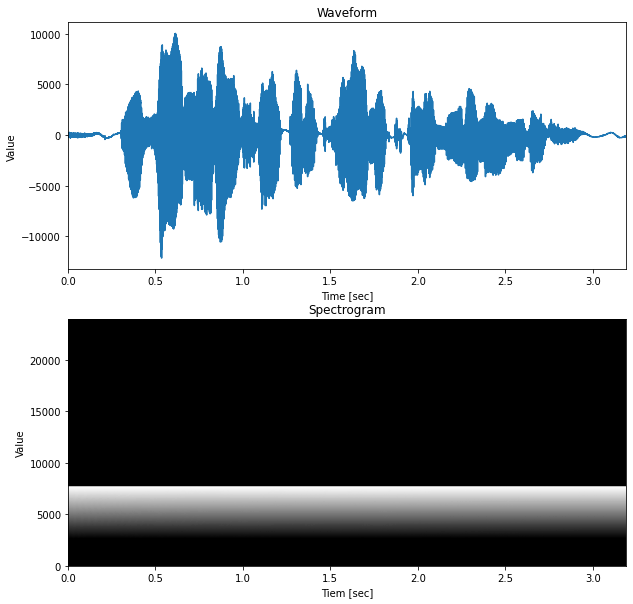

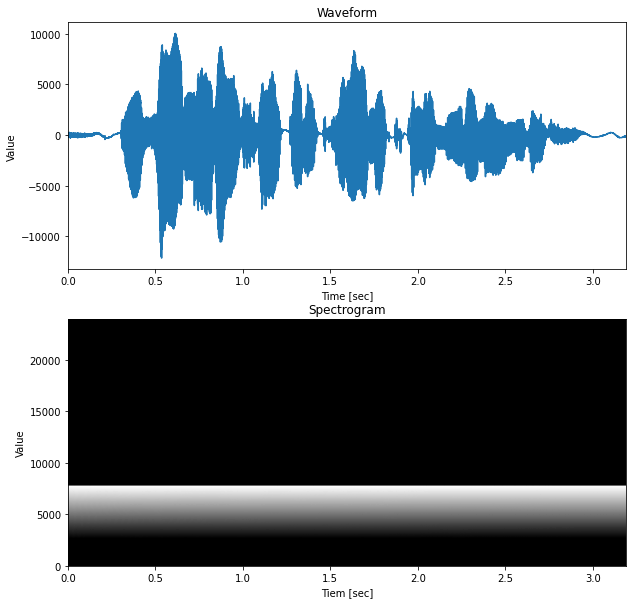

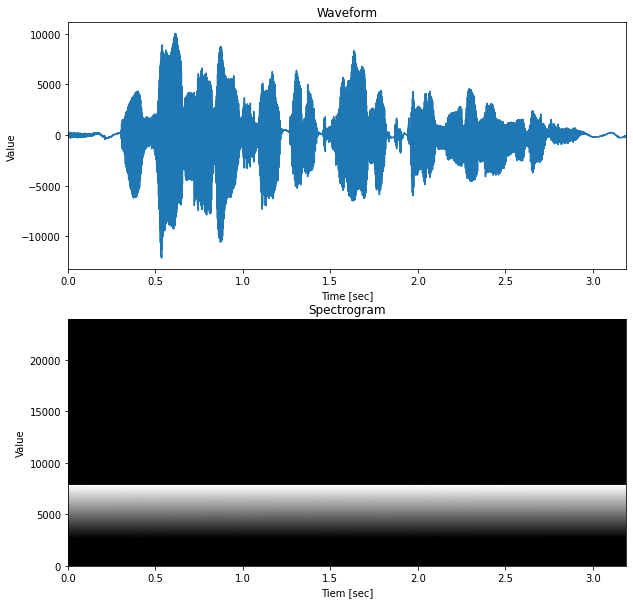

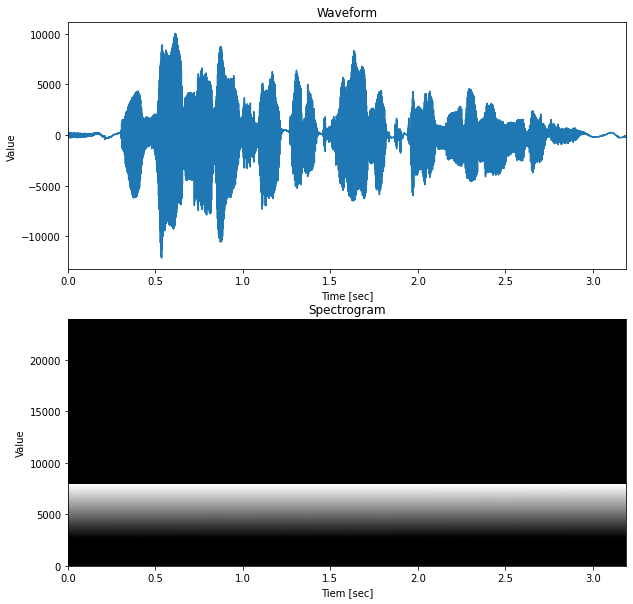

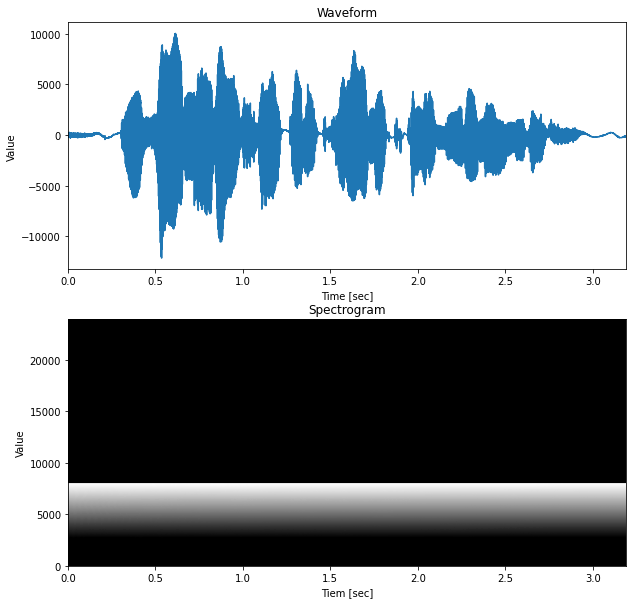

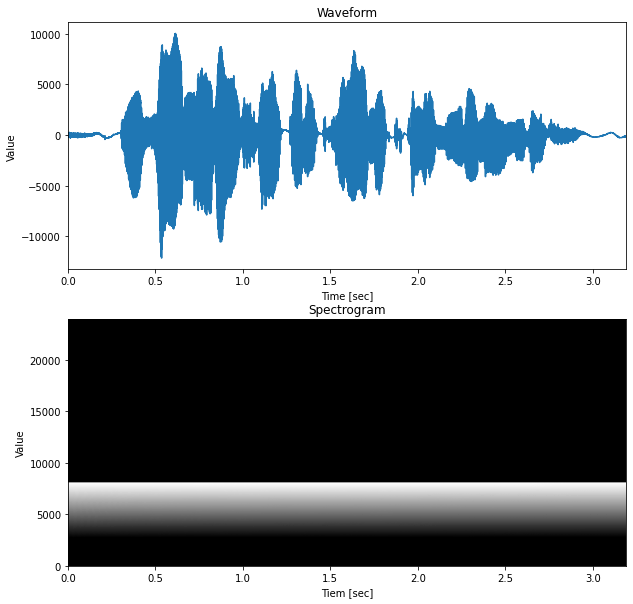

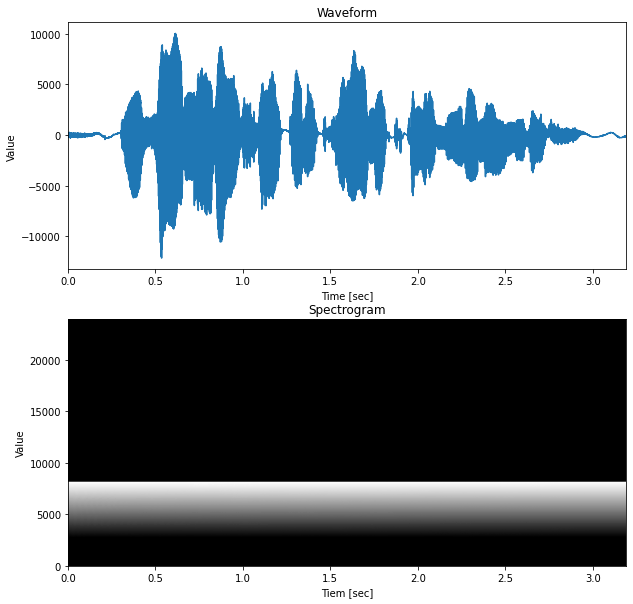

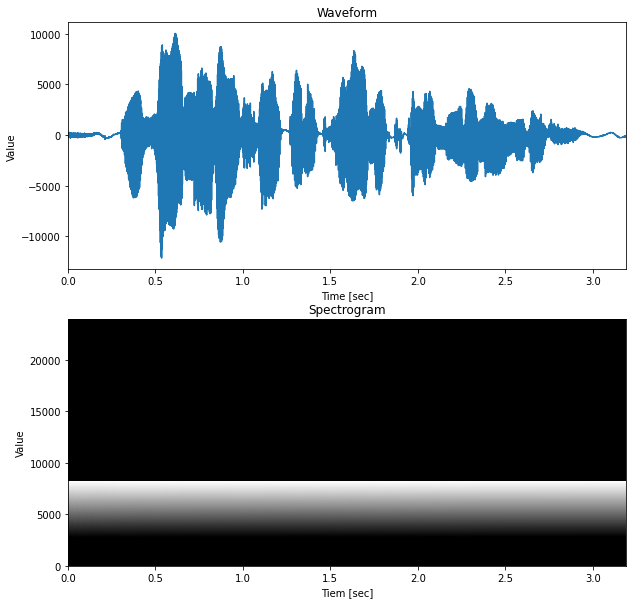

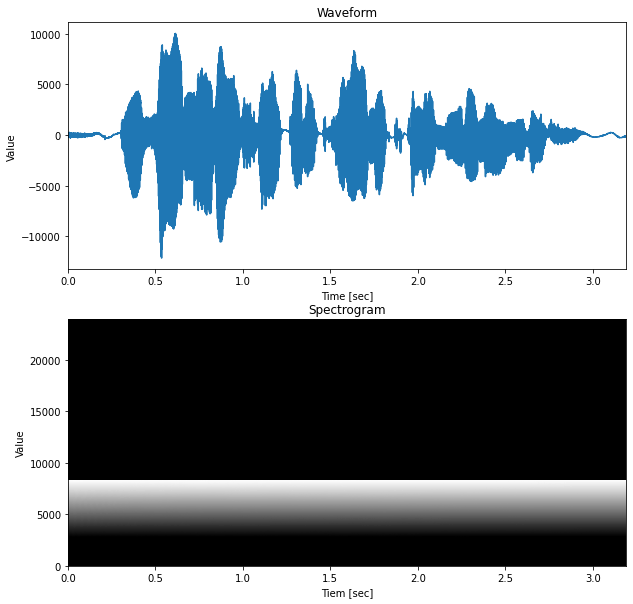

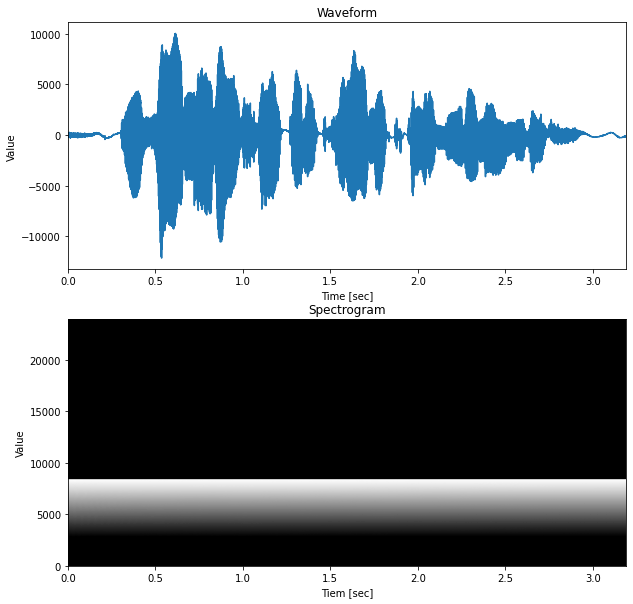

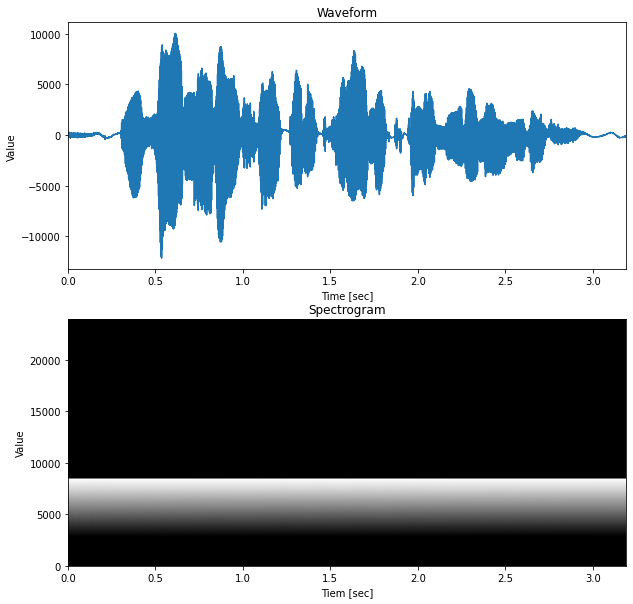

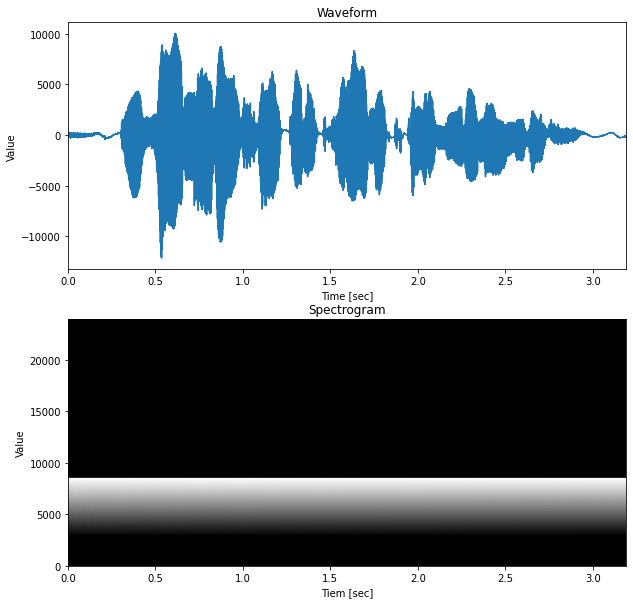

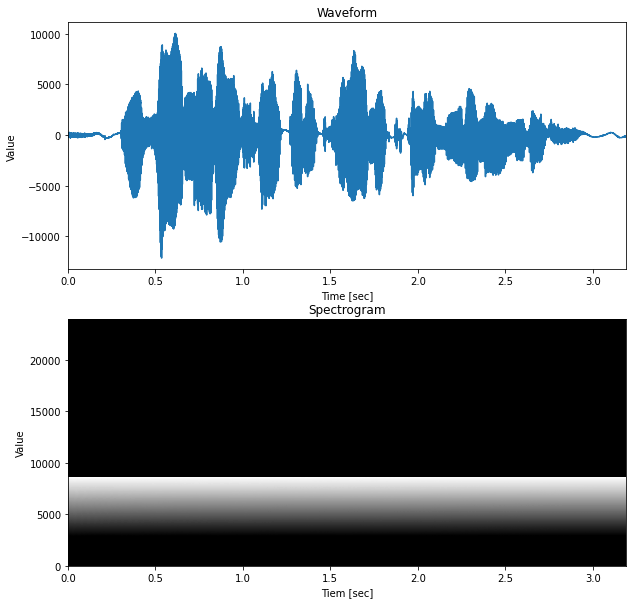

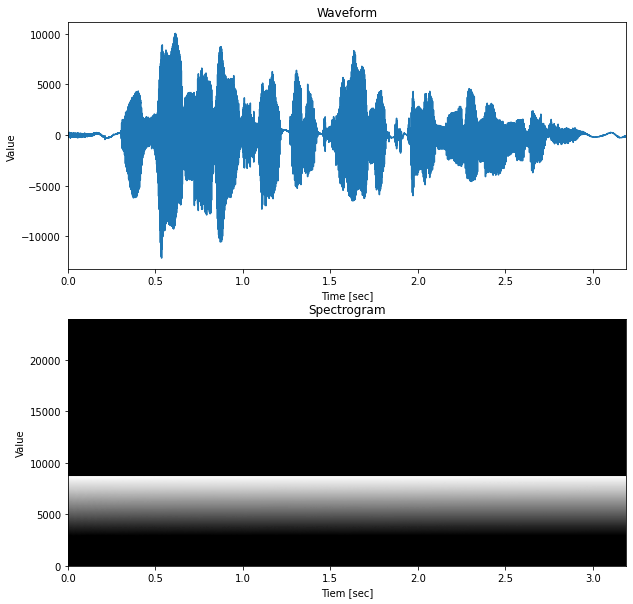

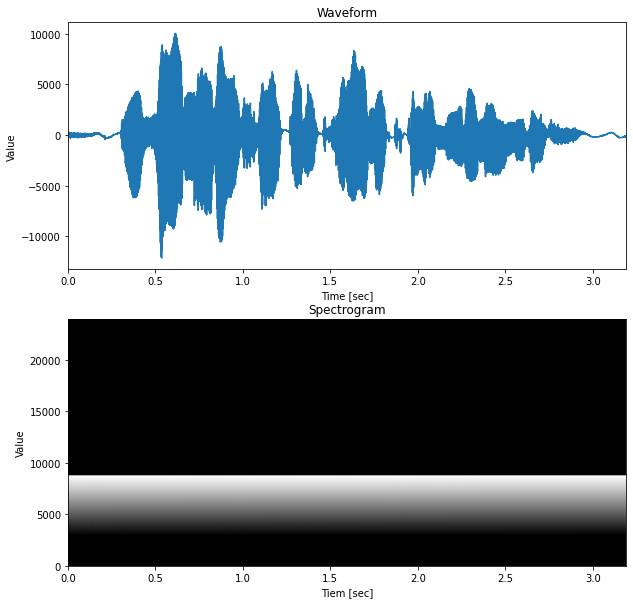

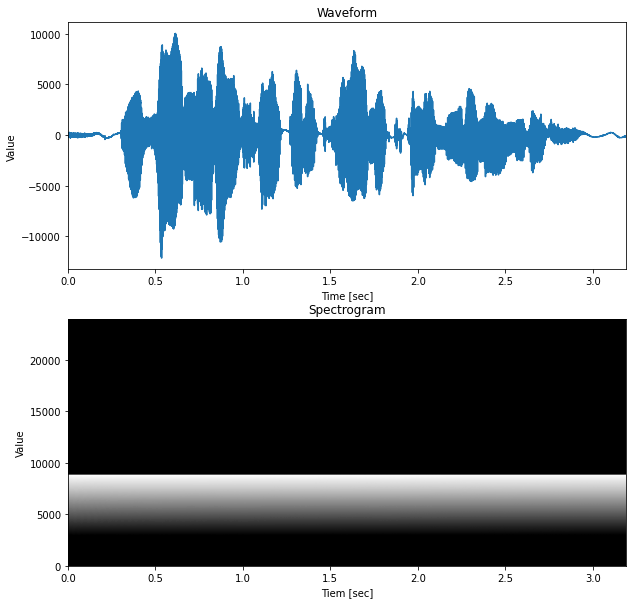

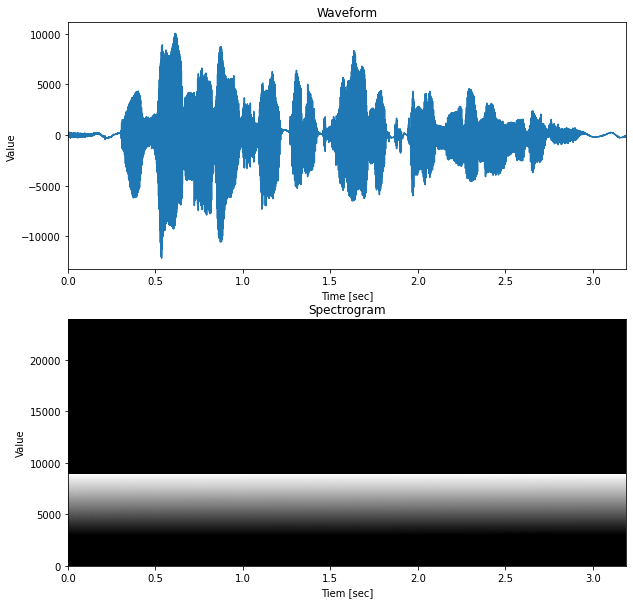

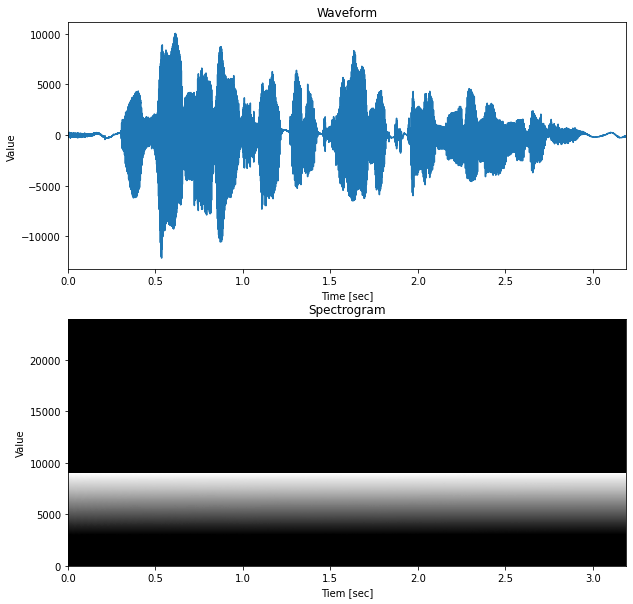

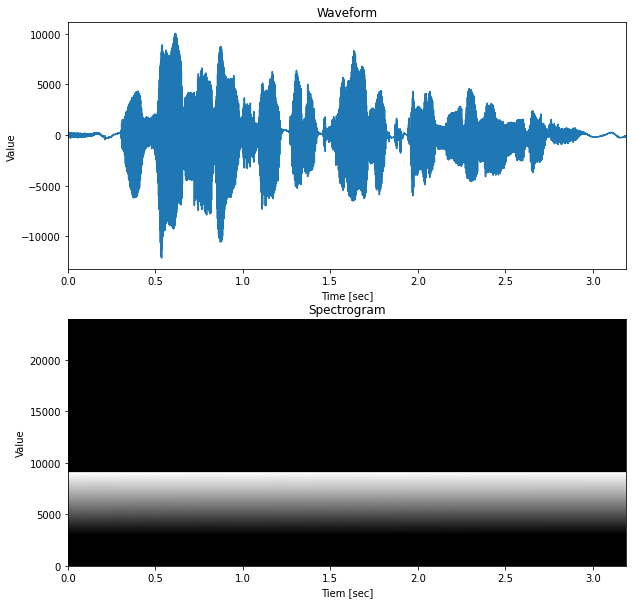

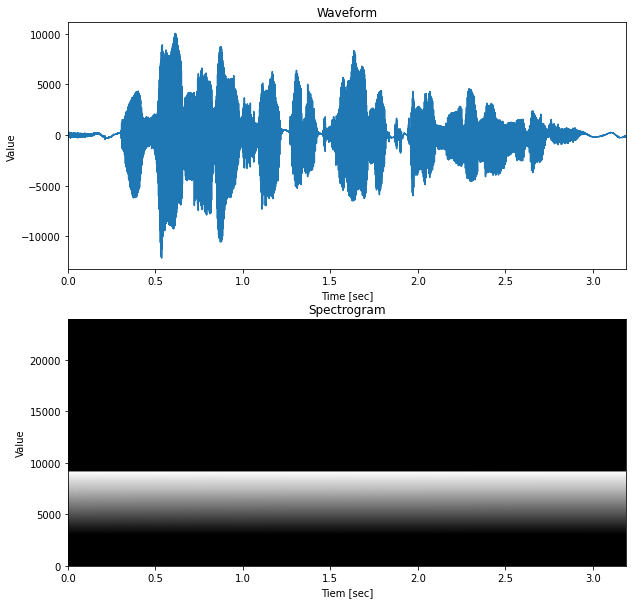

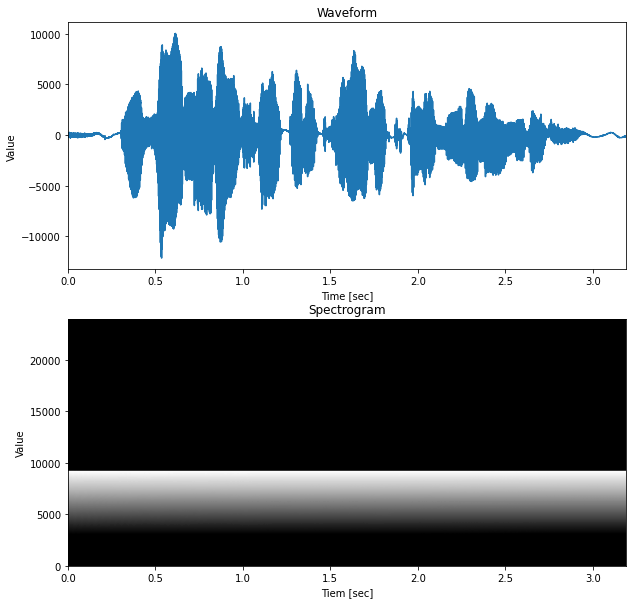

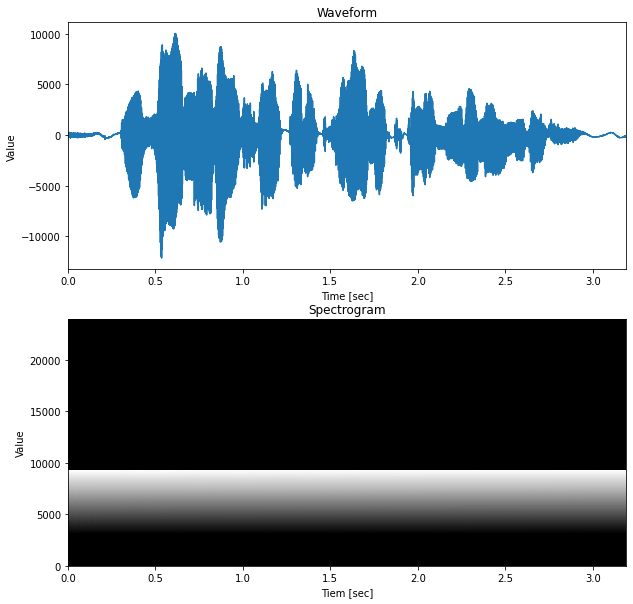

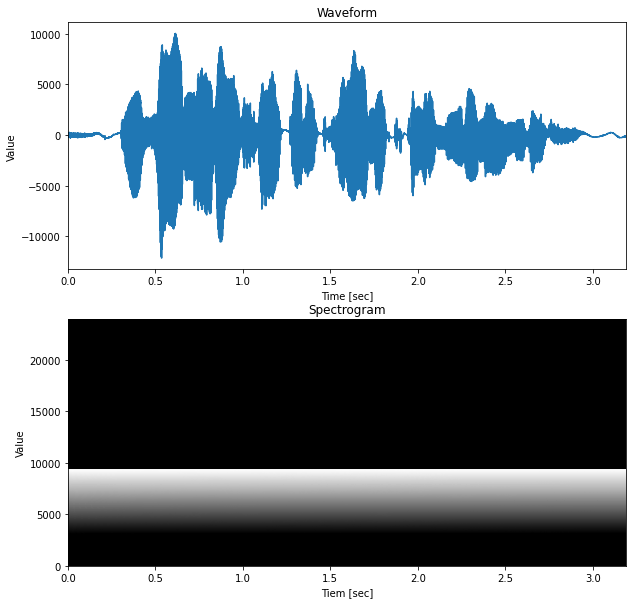

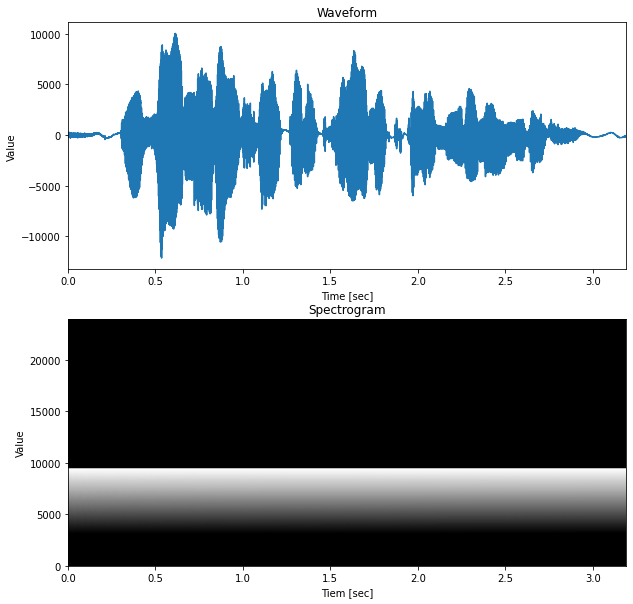

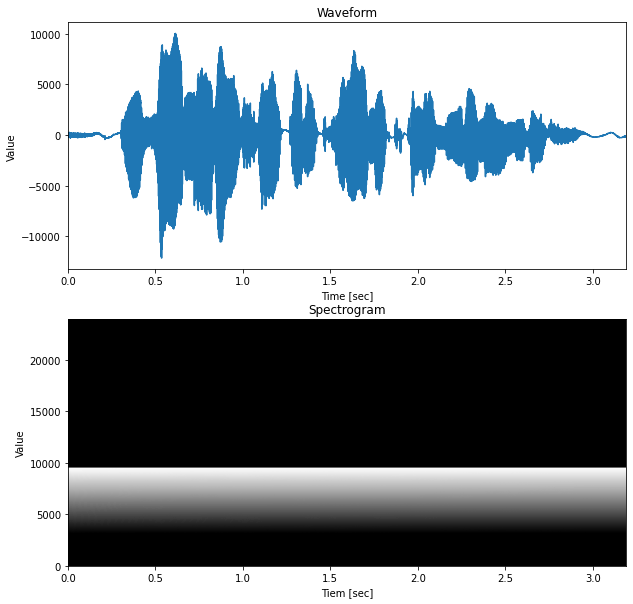

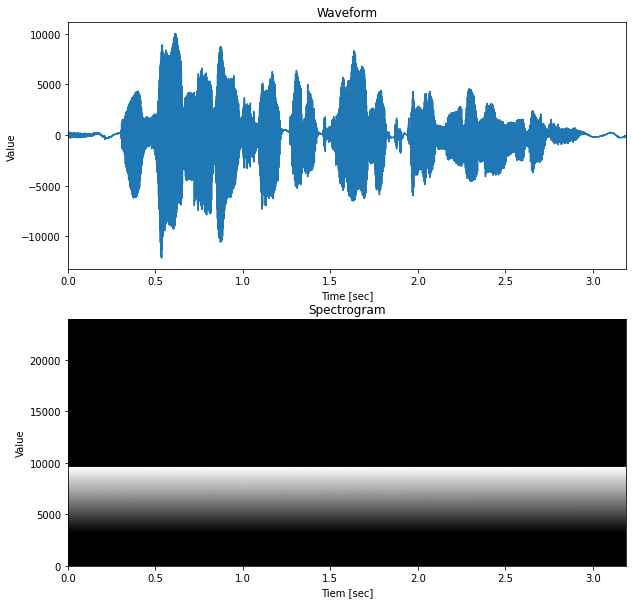

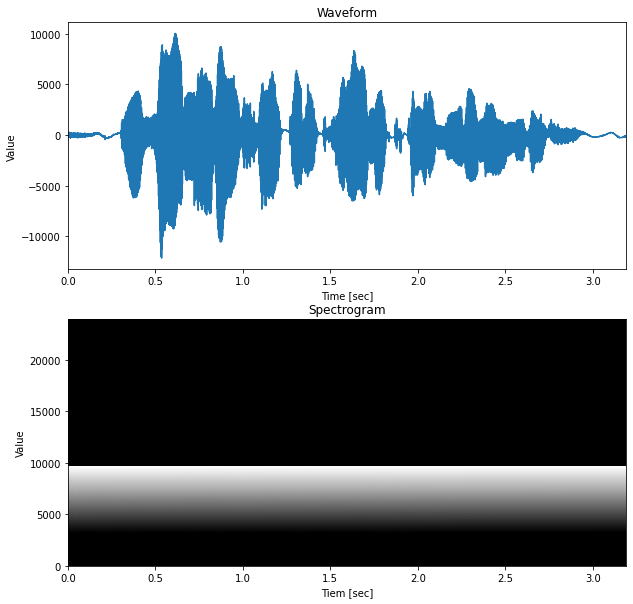

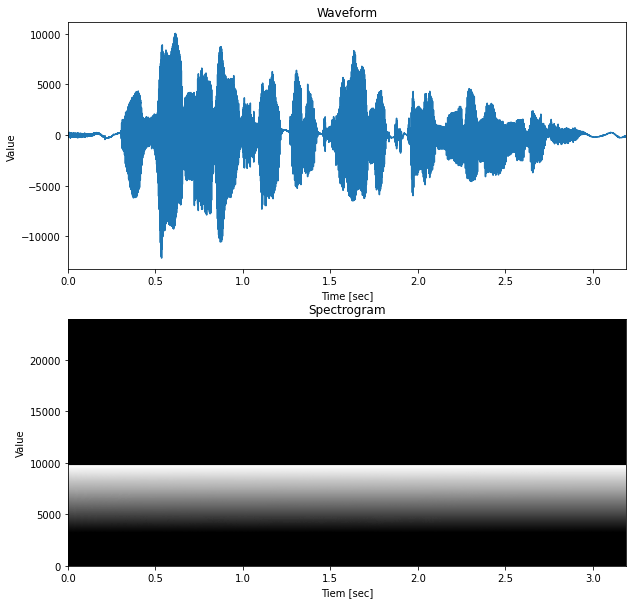

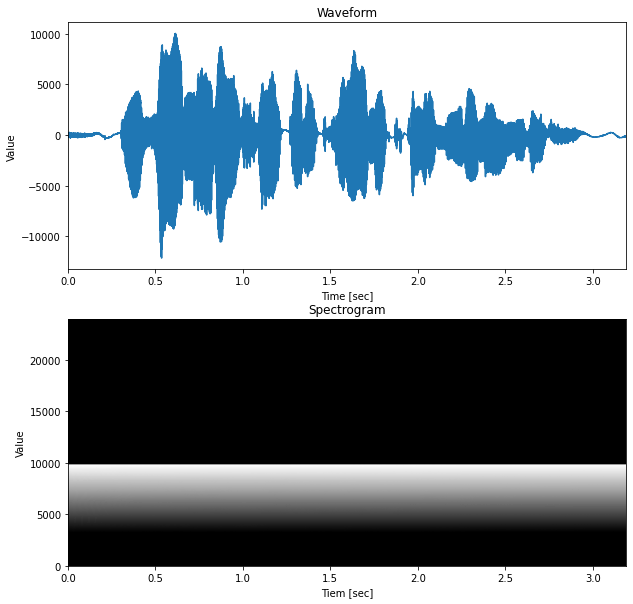

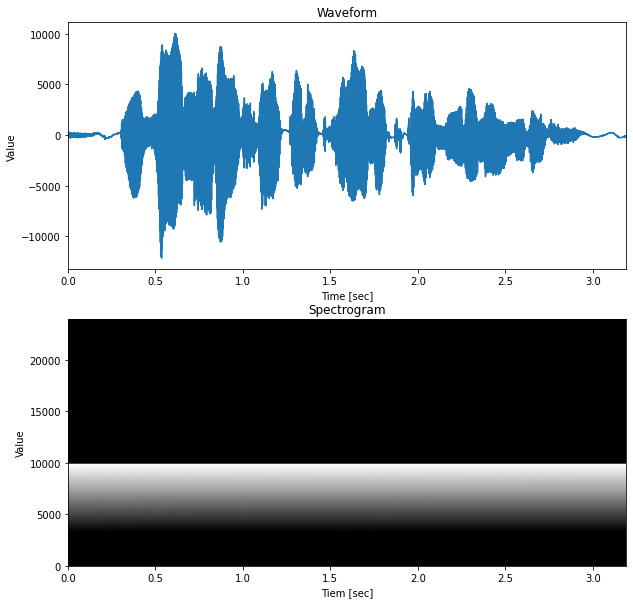

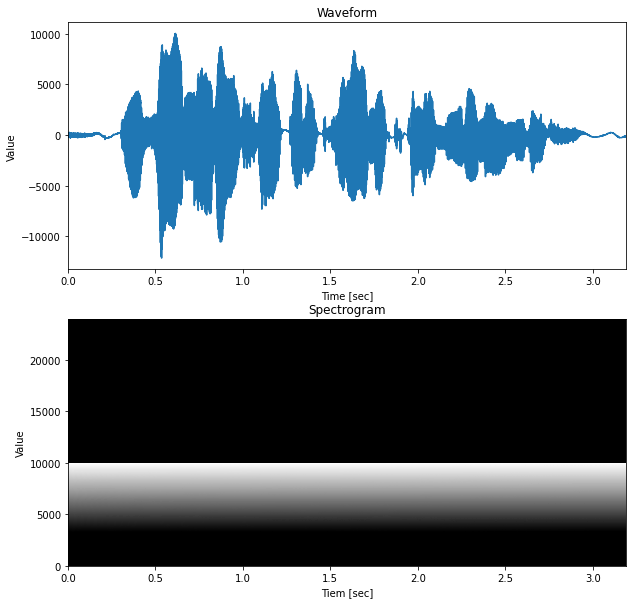

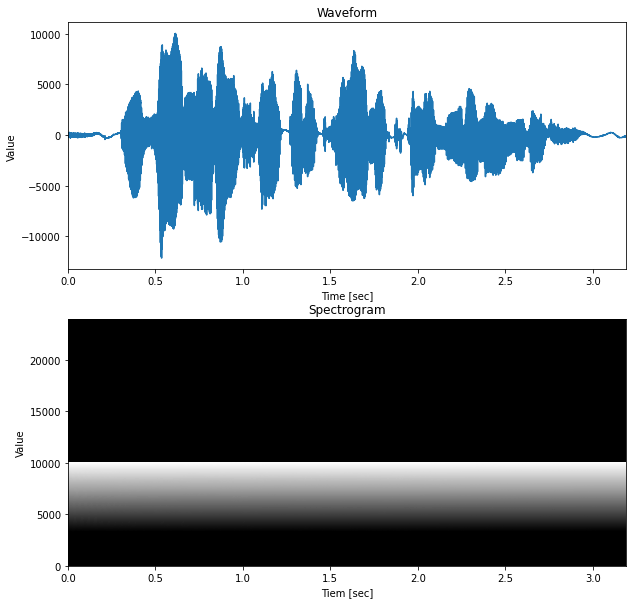

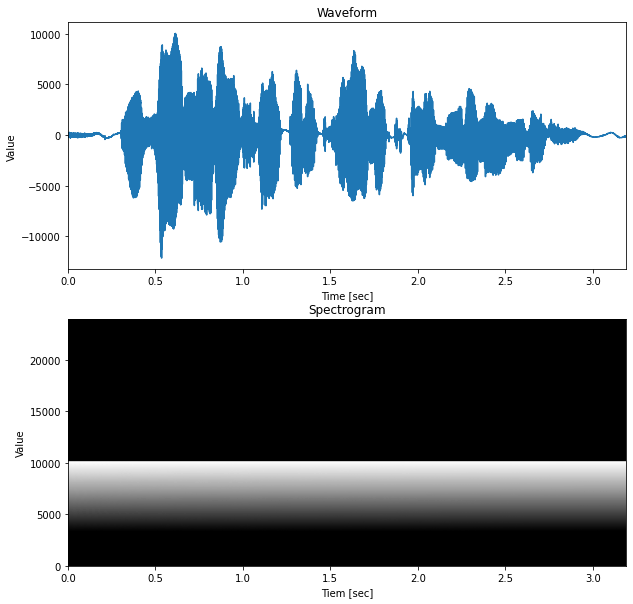

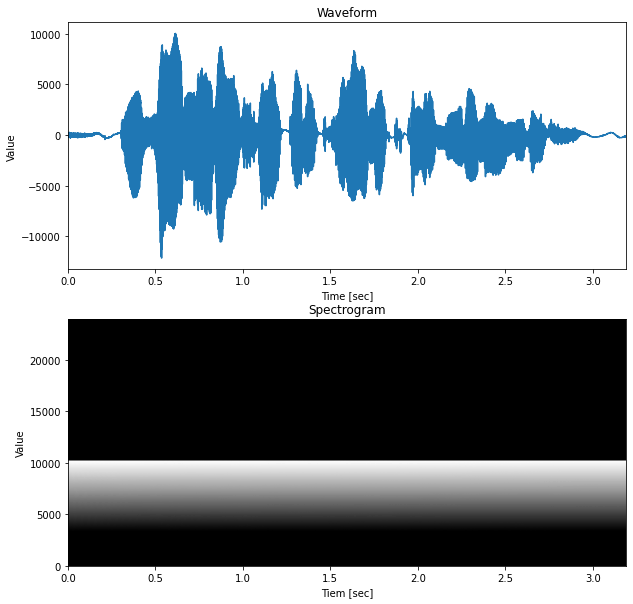

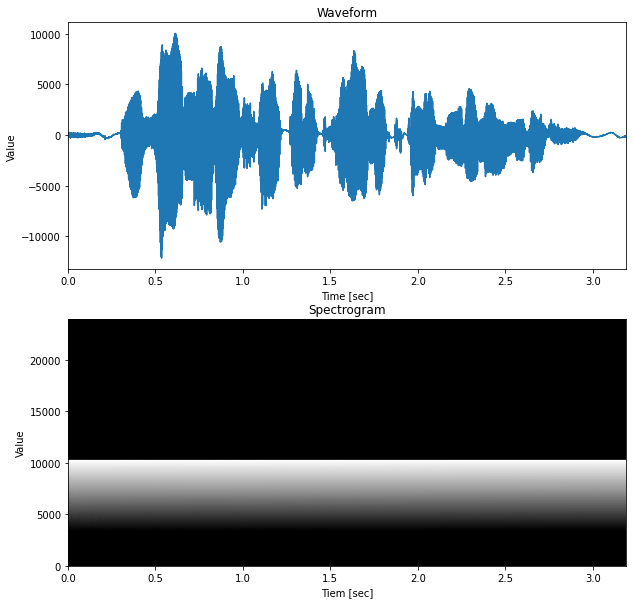

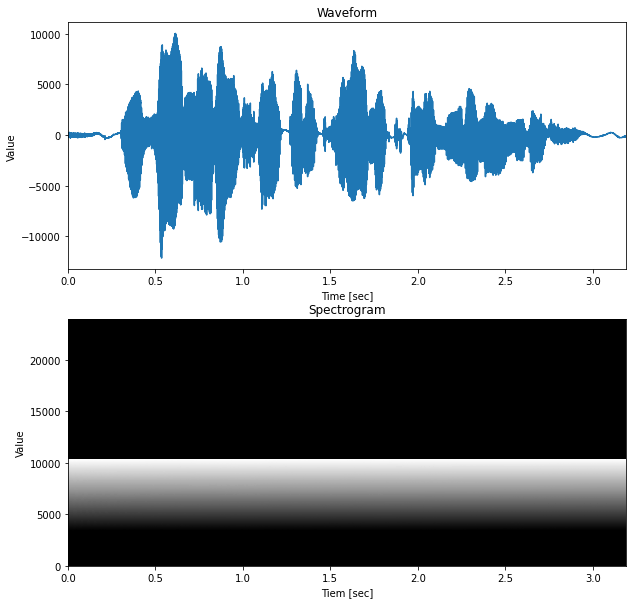

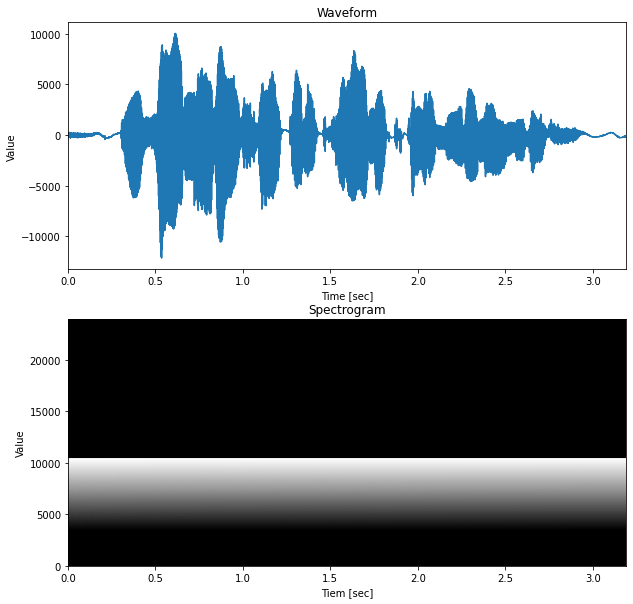

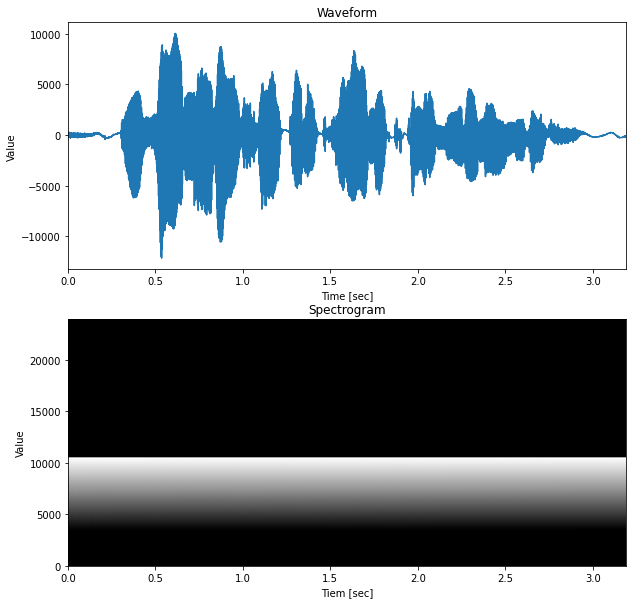

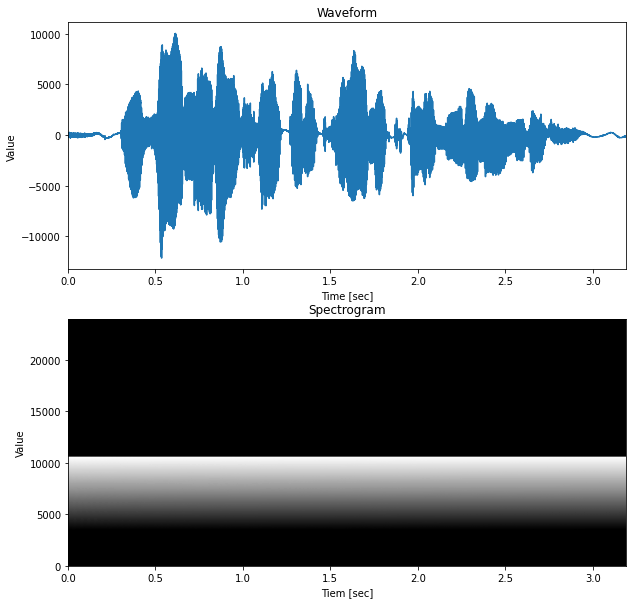

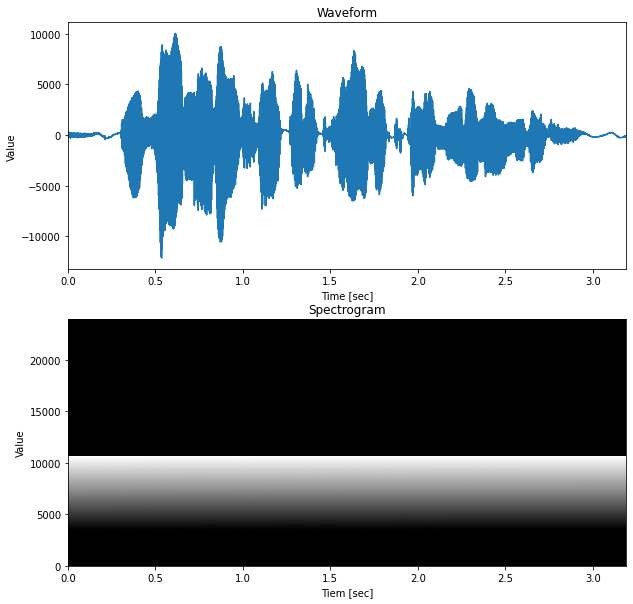

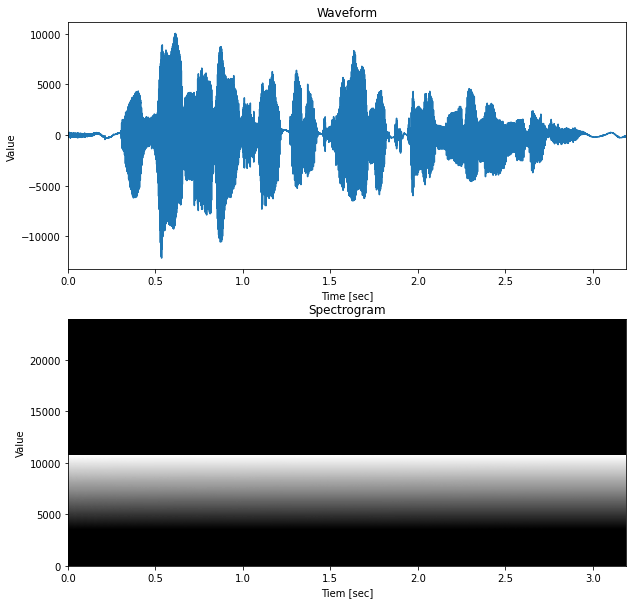

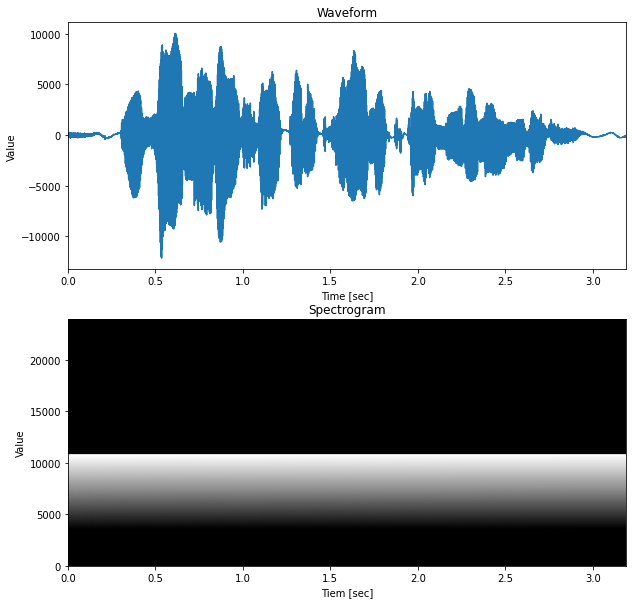

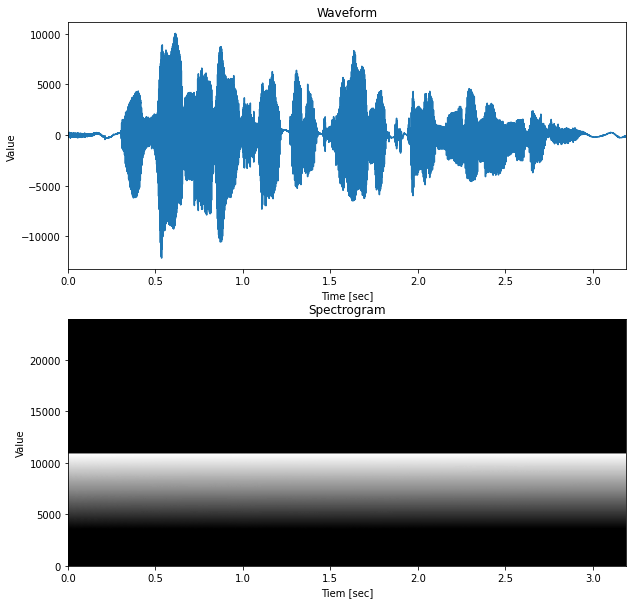

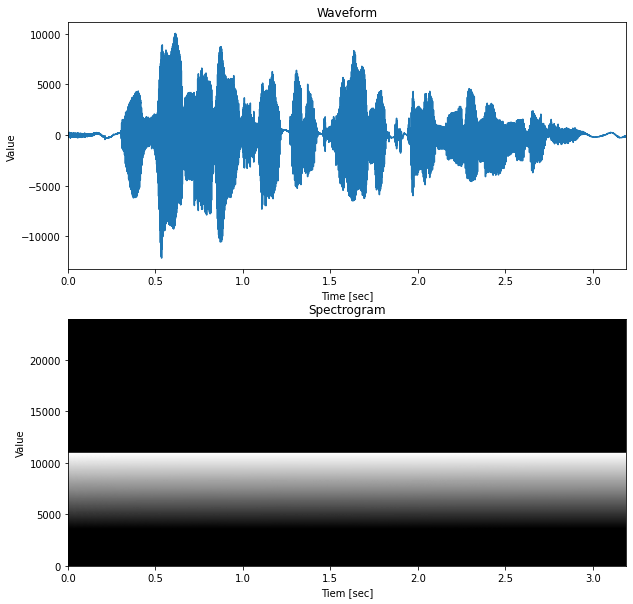

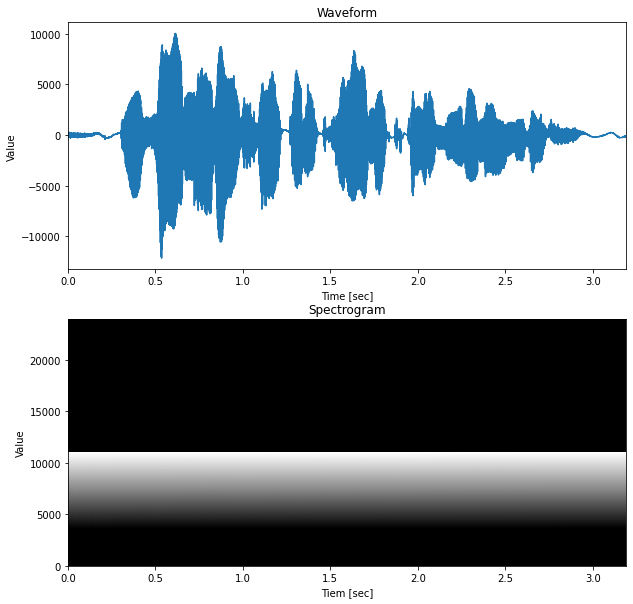

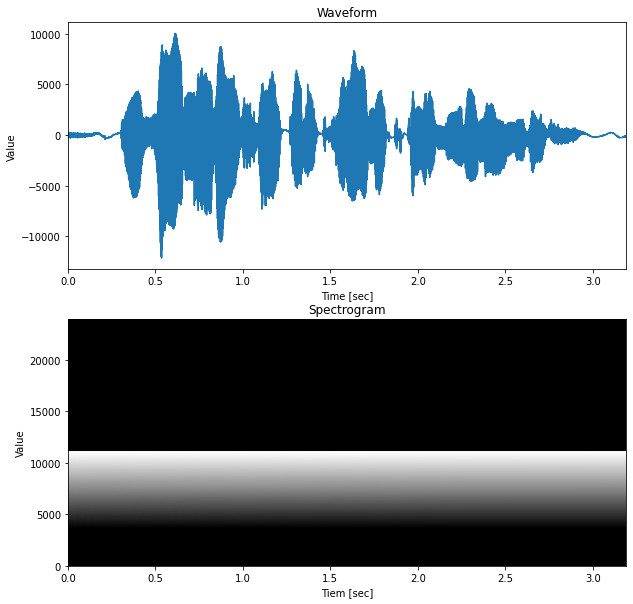

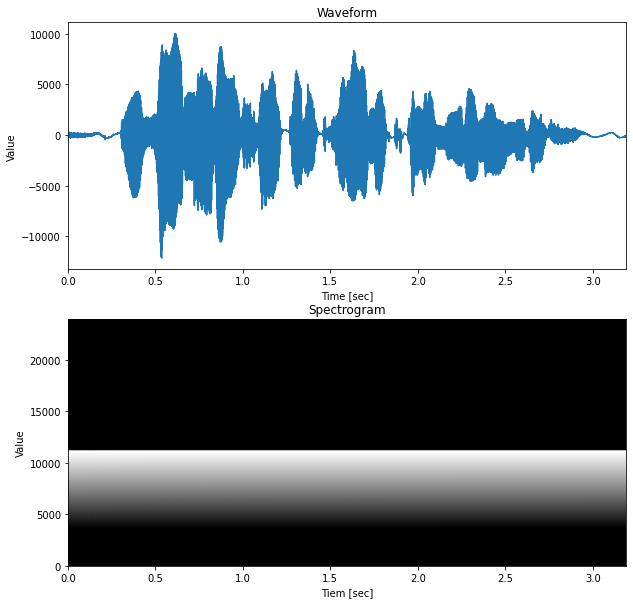

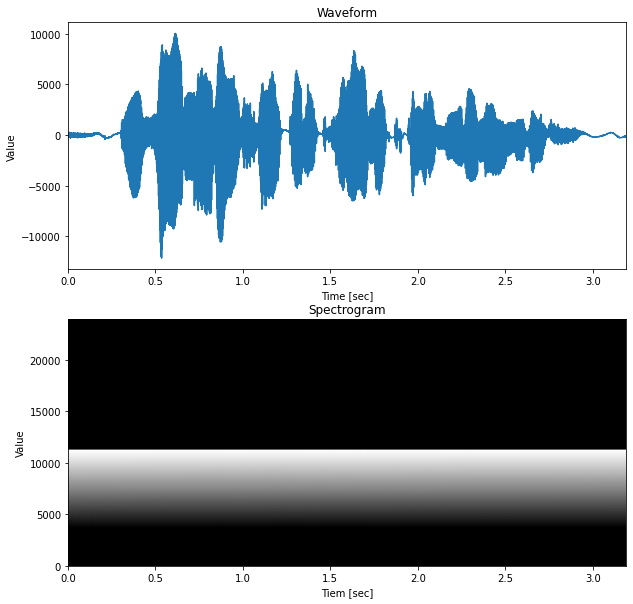

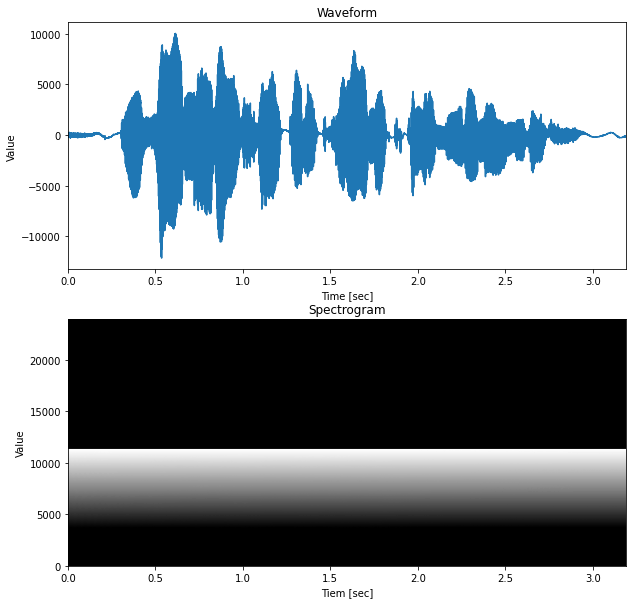

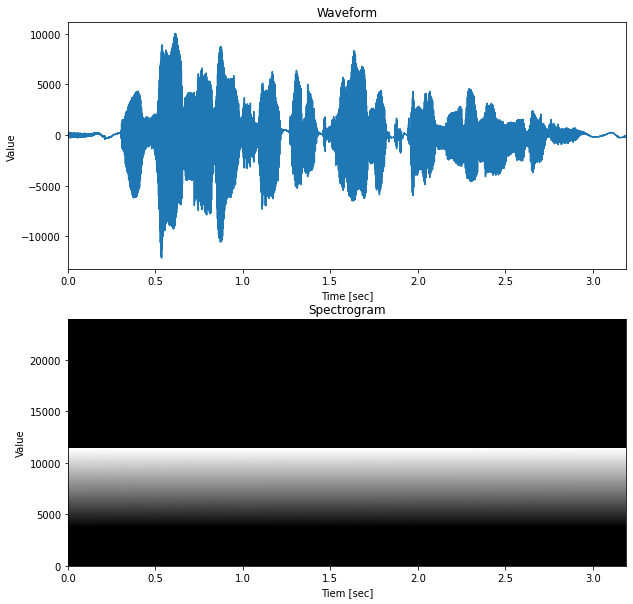

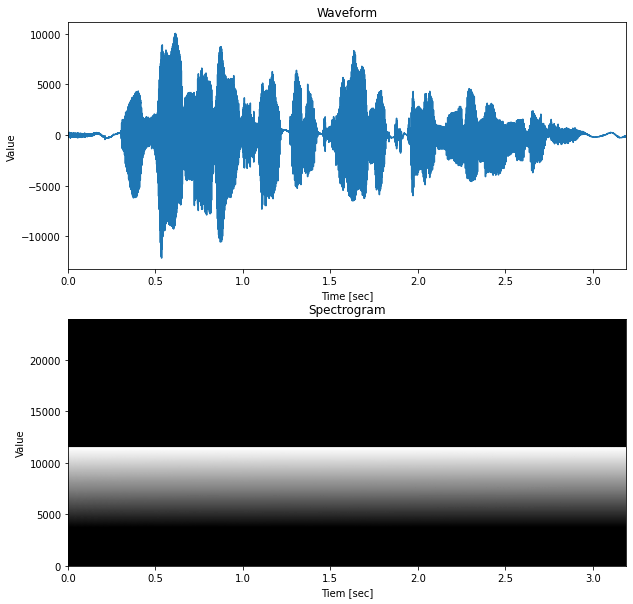

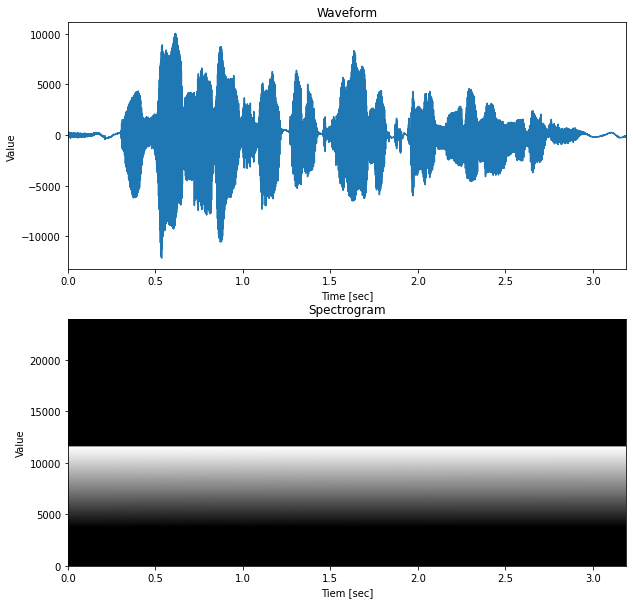

Error in callback <function flush_figures at 0x000001A31024C8B0> (for post_execute):


KeyboardInterrupt: 

In [12]:
if __name__ == '__main__':
    wav_file = './basic5000/wav/BASIC5000_0001.wav'
    out_plot = './spectrogram.png'
    
    frame_size = 25
    frame_shift = 10
    
    with wave.open(wav_file) as wav:
        sampling_frequency = wav.getframerate()
        num_samples = wav.getnframes()
        waveform = wav.readframes(num_samples)
        waveform = np.frombuffer(waveform, dtype = np.int16)
        
        frame_size = int(sampling_frequency * 0.001 * frame_size)
        frame_shift = int(sampling_frequency * 0.001 * frame_shift)
        
        fft_size = 1
        while fft_size < frame_size:
            fft_size *= 2
        
        num_frames = int((num_samples - frame_size) // frame_shift) + 1
        spectrogram = np.zeros((num_frames, int(fft_size / 2) + 1))
        
        for frame_index in range(num_frames):
            start_index = frame_index * frame_shift
            frame = waveform[start_index: (start_index + frame_size)].copy()
            frame = frame * np.hamming(frame_size)
            
            spectrum = np.fft.fft(frame, n = fft_size)
            absolute = np.abs(spectrum)
            absolute = absolute[: int(fft_size / 2) + 1]
            log_absolute = np.log(absolute)
            spectrogram[frame_index, :] = log_absolute
            
            plt.figure(figsize = (10, 10))
            plt.subplot(2, 1, 1)
            time_axis = np.arange(num_samples) / sampling_frequency
            plt.plot(time_axis, waveform)
            plt.xlim([0, num_samples / sampling_frequency]) 
            plt.title('Waveform')
            plt.xlabel('Time [sec]')
            plt.ylabel('Value')

            plt.subplot(2, 1, 2)
            spectrogram -= np.max(spectrogram)
            vmax = np.abs(np.min(spectrogram)) * 0.0
            vmin = -np.abs(np.min(spectrogram)) * 0.7
            
            plt.imshow(spectrogram[-1::-1, :], 
                      extent = [0, num_samples / sampling_frequency, 
                               0, sampling_frequency / 2], 
                      cmap = 'gray', 
                      vmax = vmax, 
                      vmin = vmin, 
                      aspect = 'auto')
            plt.title('Spectrogram')
            plt.xlabel('Tiem [sec]')
            plt.ylabel('Value')
            plt.savefig(out_plot)
        